In [96]:
# # 数据预处理
# # 导入必要的库
# import pandas as pd

# # 读取数据
# file_path = './超市.csv'
# data=""
# with open(file_path,"r",encoding="gb2312") as file:
#     data=file.read()
# with open("superMarket.csv","w",encoding="utf-8") as file:
#     file.write(data)
# # data = pd.read_csv(file_path)
# # for item in list(data):
# #     print(item)
# # # # 查看数据的基本信息，包括缺失值、数据类型等
# # # print(data.info())

# # # # 处理缺失值
# # # data = data.dropna()  # 直接删除包含缺失值的行
# # # # 如果需要填充缺失值，可以使用下面的方法
# # # # data = data.fillna(value)  

# # # # 处理错误数据
# # # # 在实际情况中，错误数据可能涉及到特定的业务逻辑，需要根据具体情况进行处理

# # # # 处理重复数据
# # # data = data.drop_duplicates()

# # # # 查看处理后的数据信息
# # # print(data.info())
# # # 或者使用可视化工具查看缺失值的分布情况
# # import seaborn as sns
# # import matplotlib.pyplot as plt

# # plt.figure(figsize=(10, 6))
# # sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
# # plt.title('缺失值分布图')
# # plt.show()

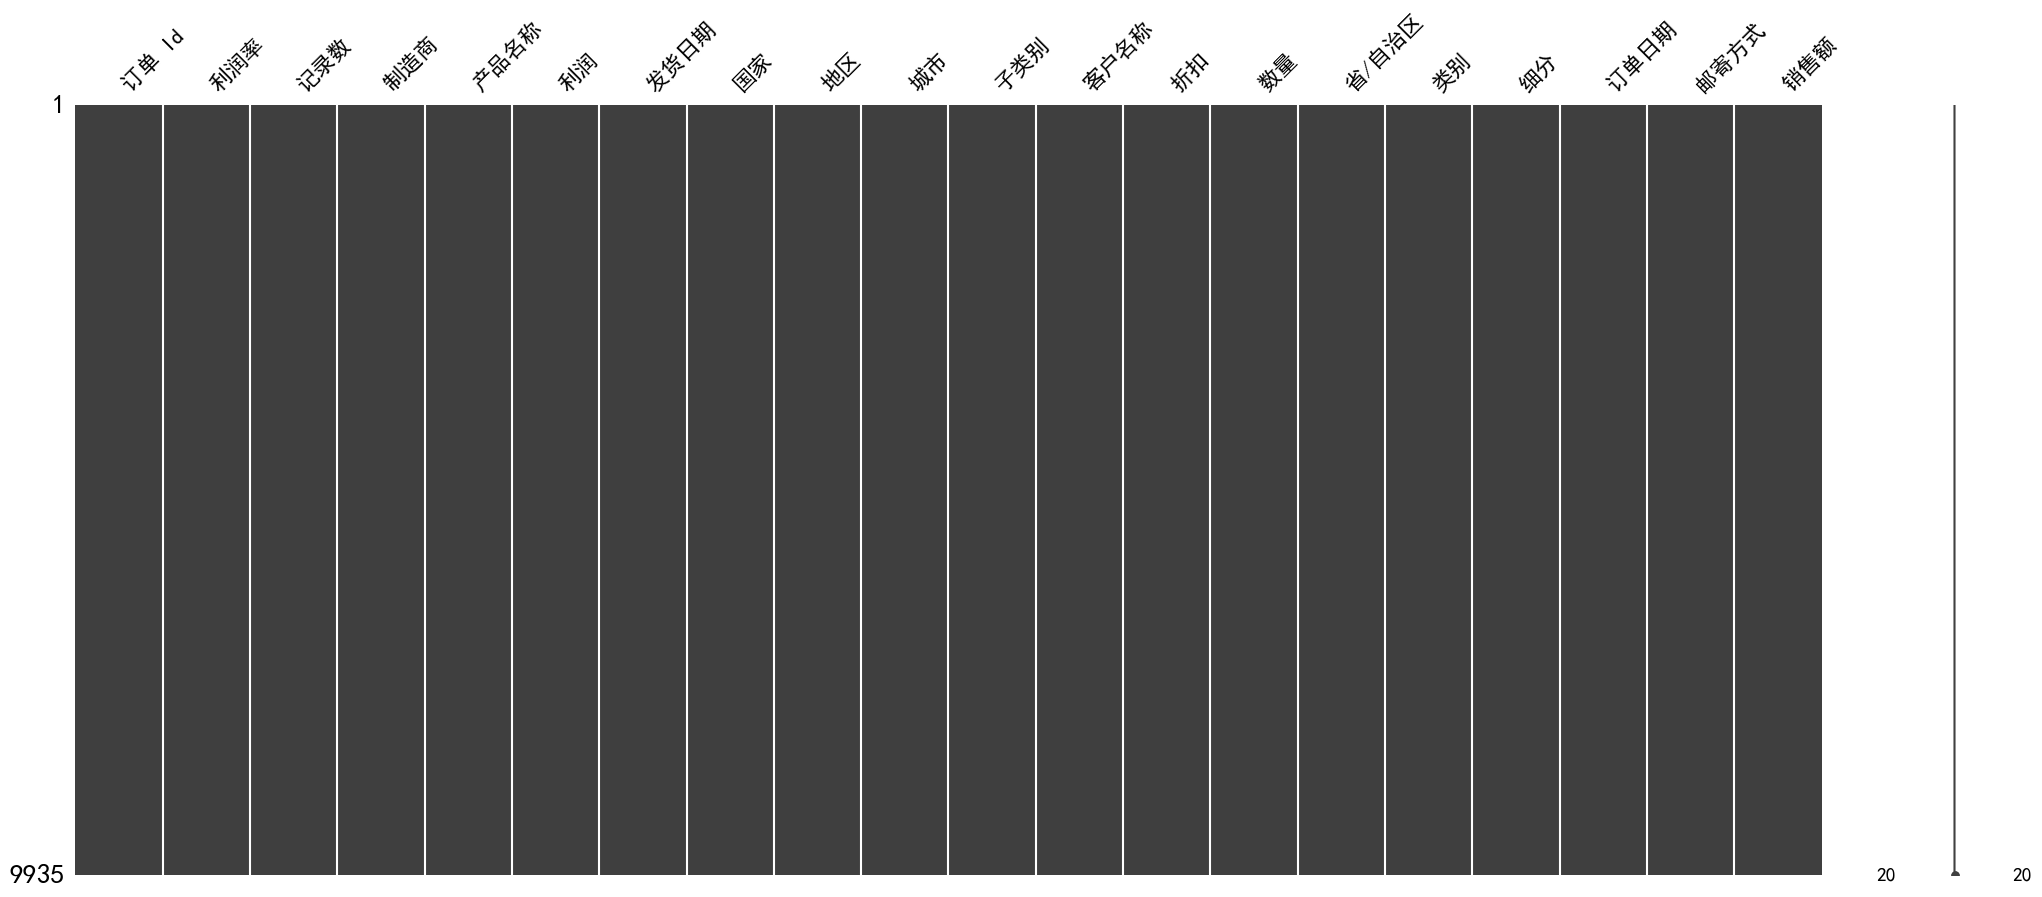

In [97]:
# 缺失矩阵
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# 关闭 LaTeX 渲染器
plt.rcParams['text.usetex'] = False
# 设置全局字体为宋体
plt.rcParams['font.sans-serif'] = ['SimHei']  

# 读取CSV文件
file_path = 'superMarket.csv'
df = pd.read_csv(file_path)

# 构建缺失矩阵
missing_matrix = msno.matrix(df)
plt.show()

In [98]:
df.describe()

利润率     记录数            利润           折扣           数量   
count  9935.000000  9935.0   9935.000000  9935.000000  9935.000000  \
mean      0.085460     1.0    213.632612     0.107111     3.768093   
std       0.465521     0.0    856.568912     0.187930     2.236421   
min      -4.000000     1.0  -7978.000000     0.000000     1.000000   
25%       0.020000     1.0      7.000000     0.000000     2.000000   
50%       0.170000     1.0     74.000000     0.000000     3.000000   
75%       0.340000     1.0    276.000000     0.200000     5.000000   
max       0.500000     1.0  10108.000000     0.800000    14.000000   

                销售额  
count   9935.000000  
mean    1608.892099  
std     2630.089315  
min       13.000000  
25%      249.500000  
50%      637.000000  
75%     1785.000000  
max    35621.000000

In [99]:
# 异常值处理
import pandas as pd

# 读取数据
data = pd.read_csv('superMarket.csv')

# 选择数值特征
numeric_features = ['利润率', '记录数', '利润', '折扣', '数量', '销售额']

# 计算每个数值特征的均值和标准差
means = data[numeric_features].mean()
std_devs = data[numeric_features].std()

# 定义阈值，例如，均值加减2倍标准差
threshold = 2

# 标识异常值
outliers = ((data[numeric_features] - means).abs() > threshold * std_devs).any(axis=1)

# 打印异常值
# print(outliers)
print("异常值数量:", outliers.sum())
print("异常值:")
print(data[outliers])

# 去除异常值
cleaned_data = data[~outliers]
cleaned_data.to_csv("preprocessed.csv",index=False)

异常值数量: 1144
异常值:
                订单 Id   利润率  记录数             制造商                   产品名称   
5     CN-2013-4497736  0.34    1             柯尼卡            柯尼卡 打印机, 红色  \
7     CN-2013-4497736  0.31    1           Safco          SAFCO 扶手椅, 可调   
14    CN-2013-2752724  0.48    1             诺基亚            诺基亚 充电器, 蓝色   
15    US-2014-2511714 -0.38    1      KitchenAid      KitchenAid 冰箱, 黑色   
41    US-2014-3857264 -0.22    1        Breville        Breville 炉灶, 黑色   
...               ...   ...  ...             ...                    ...   
9891  CN-2012-2508741  0.08    1          Hoover          Hoover 冰箱, 银色   
9899  CN-2013-3405401  0.29    1            Bush            Bush 搁架, 黑色   
9914  US-2015-4180783  0.00    1  Hamilton Beach  Hamilton Beach 炉灶, 红色   
9933  CN-2015-4318875 -0.33    1              罗技             罗技 路由器, 耐用   
9934  CN-2012-3557528 -0.48    1        Breville        Breville 冰箱, 白色   

          利润        发货日期  国家  地区   城市 子类别 客户名称   折扣  数量 省/自治区    类别    细分   
5    

In [100]:
# 重复值处理
duplicates=cleaned_data.duplicated()
# 打印重复行的数量和具体的重复行
print("重复行数量:", duplicates.sum())
print("重复行:")
print(cleaned_data[duplicates])

重复行数量: 0
重复行:
Empty DataFrame
Columns: [订单 Id, 利润率, 记录数, 制造商, 产品名称, 利润, 发货日期, 国家, 地区, 城市, 子类别, 客户名称, 折扣, 数量, 省/自治区, 类别, 细分, 订单日期, 邮寄方式, 销售额]
Index: []


In [101]:
# # 数值化
# file_path="./test.csv"
# data = pd.read_csv(file_path, thousands=',')

# # 处理百分比列
# data['利润率'] = data['利润率'].str.rstrip('%').astype('float') / 100.0

# # 处理金额列
# data['利润'] = data['利润'].replace('[\$,]', '', regex=True).astype(float)

# # 处理日期列
# data['发货日期'] = pd.to_datetime(data['发货日期'])
# data['订单日期'] = pd.to_datetime(data['订单日期'])
# # 显示处理后的数据
# print(data)

制造商订单数量统计：
 制造商
Avery                276
Novimex              272
Tenex                269
Eldon                266
Harbour Creations    265
Smead                253
Hon                  248
Advantus             244
Enermax              237
Safco                229
Name: 订单 Id, dtype: int64


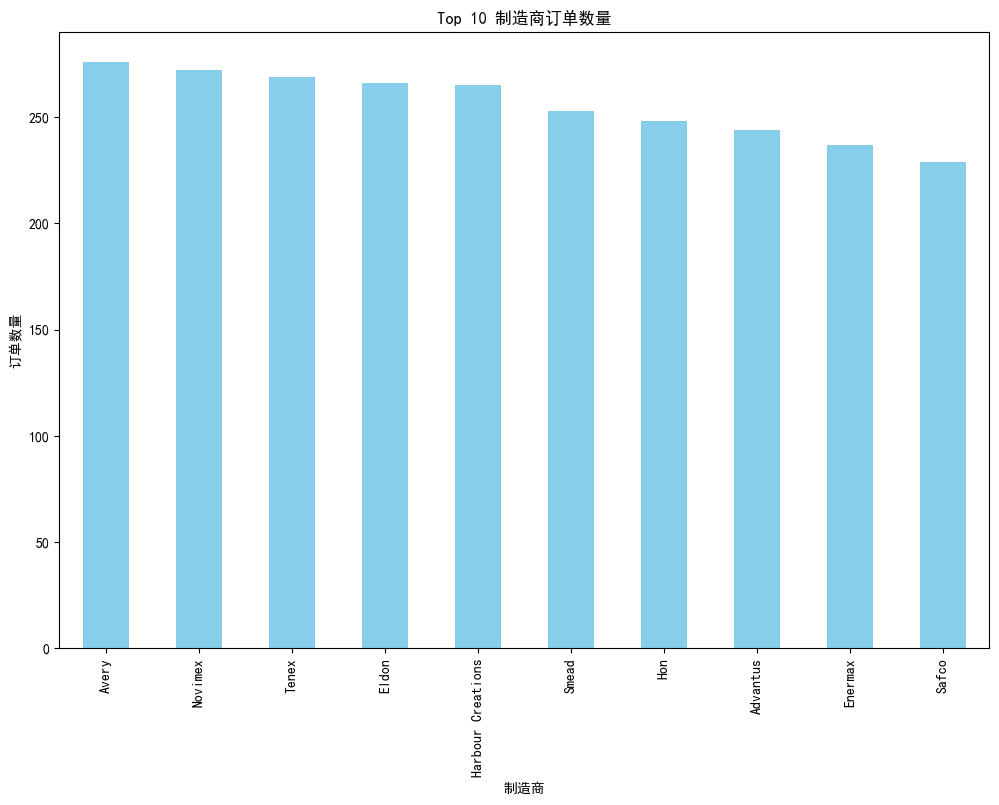

In [102]:
# 探究问题一 零售业务的特征
# 订单数量统计
import pandas
data=pandas.read_csv("./preprocessed.csv")
order_count = data.groupby('制造商')['订单 Id'].count().sort_values(ascending=False)
print("制造商订单数量统计：\n", order_count.head(10))

# 制造商订单数量可视化
plt.figure(figsize=(12, 8))
order_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 制造商订单数量')
plt.xlabel('制造商')
plt.ylabel('订单数量')
plt.show()


商品类别top订单数量统计：
 子类别
装订机    843
椅子     757
收纳具    742
信封     600
用具     579
用品     573
系固件    553
标签     534
纸张     532
配件     522
Name: 订单 Id, dtype: int64
商品类别tail订单数量统计：
 子类别
标签     534
纸张     532
配件     522
书架     484
电话     482
复印机    465
器具     408
美术     369
设备     271
桌子      77
Name: 订单 Id, dtype: int64


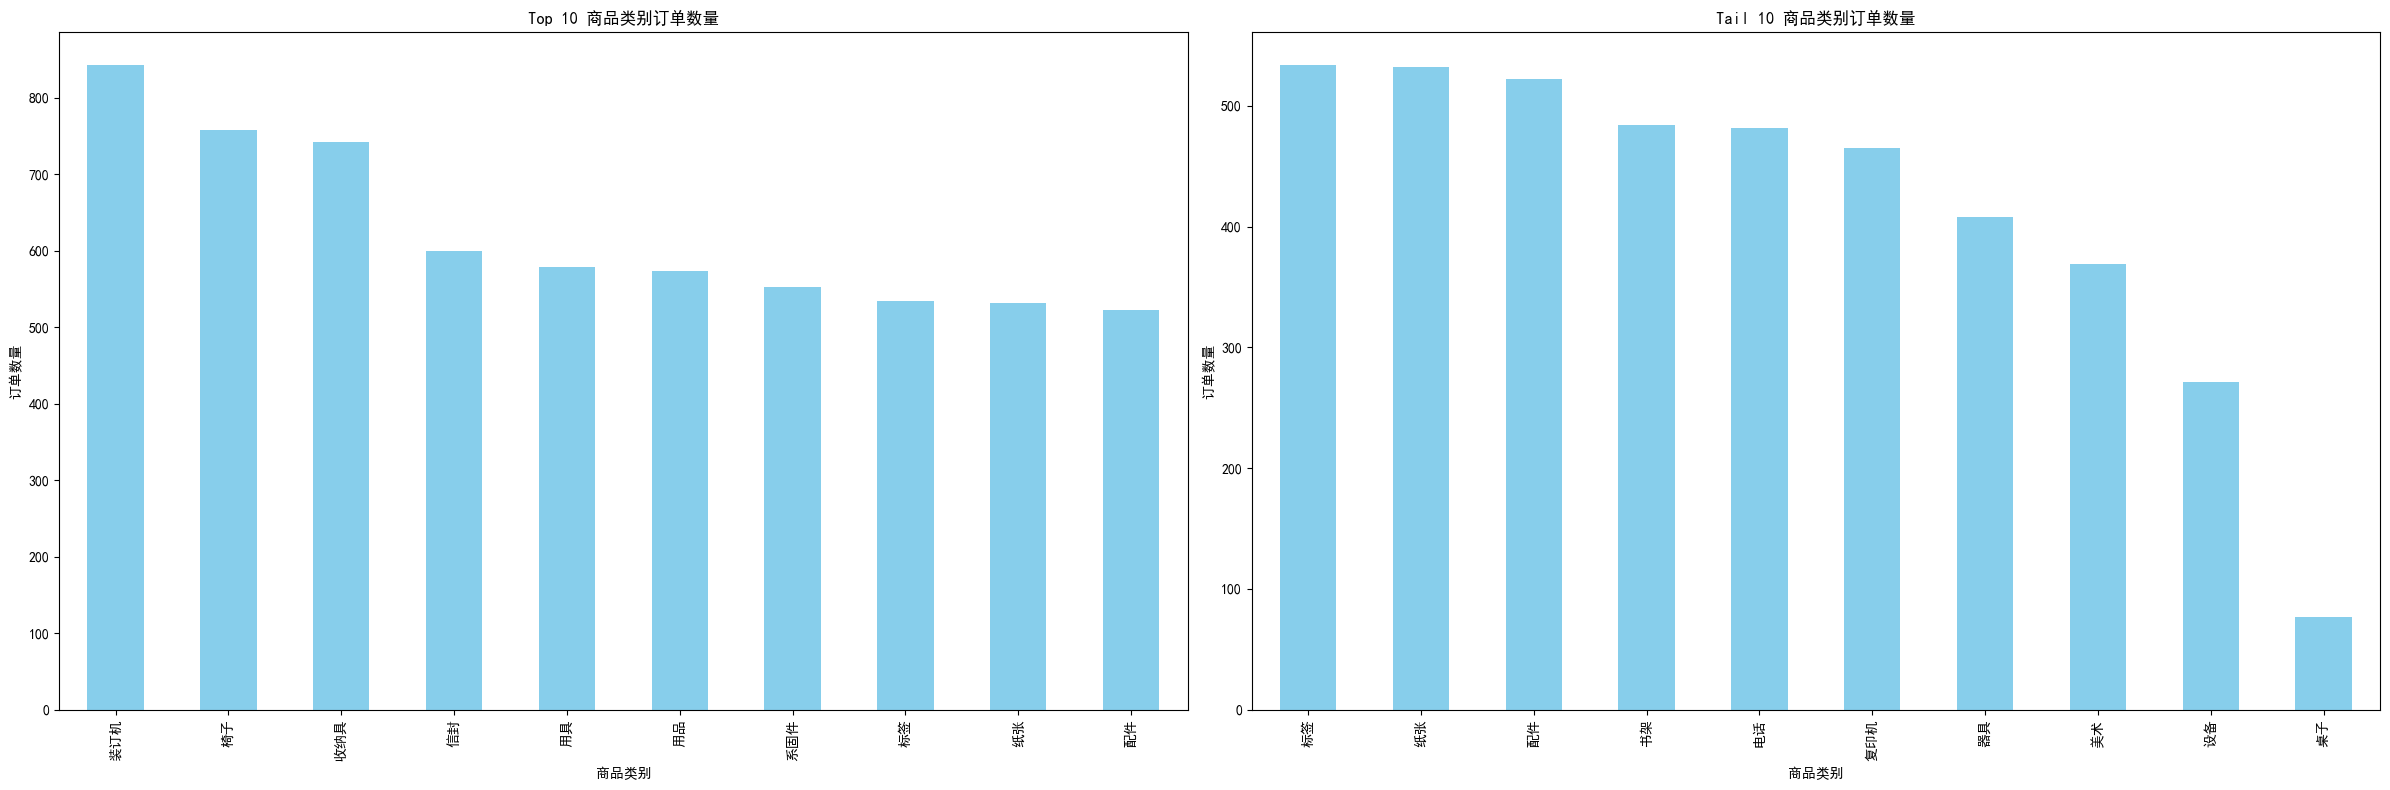

In [103]:
# 探究问题一 零售业务的特征
# 商品类别与订单数统计
import pandas
data=pandas.read_csv("./preprocessed.csv")
order_count = data.groupby('子类别')['订单 Id'].count().sort_values(ascending=False)
print("商品类别top订单数量统计：\n", order_count.head(10))
print("商品类别tail订单数量统计：\n", order_count.tail(10))
# 商品订单数量可视化
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)  # 1行2列，当前是第1个子图
order_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 商品类别订单数量')
plt.xlabel('商品类别')
plt.ylabel('订单数量')


plt.subplot(1, 2, 2)  # 1行2列，当前是第2个子图
order_count.tail(10).plot(kind='bar', color='skyblue')
plt.title('Tail 10 商品类别订单数量')
plt.xlabel('商品类别')
plt.ylabel('订单数量')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

消费人群订单数量统计：
 细分
消费者     4519
公司      2734
小型企业    1538
Name: 订单 Id, dtype: int64
子类别订单数量统计：
 子类别
装订机    449
椅子     389
收纳具    388
用具     316
信封     306
用品     301
系固件    278
纸张     276
标签     266
配件     263
Name: 订单 Id, dtype: int64
子类别订单数量统计：
 子类别
装订机    251
椅子     228
收纳具    205
信封     196
用品     190
电话     169
纸张     169
系固件    169
配件     168
标签     166
Name: 订单 Id, dtype: int64
子类别订单数量统计：
 子类别
收纳具    149
装订机    143
椅子     140
系固件    106
标签     102
用具     101
信封      98
书架      94
配件      91
纸张      87
Name: 订单 Id, dtype: int64


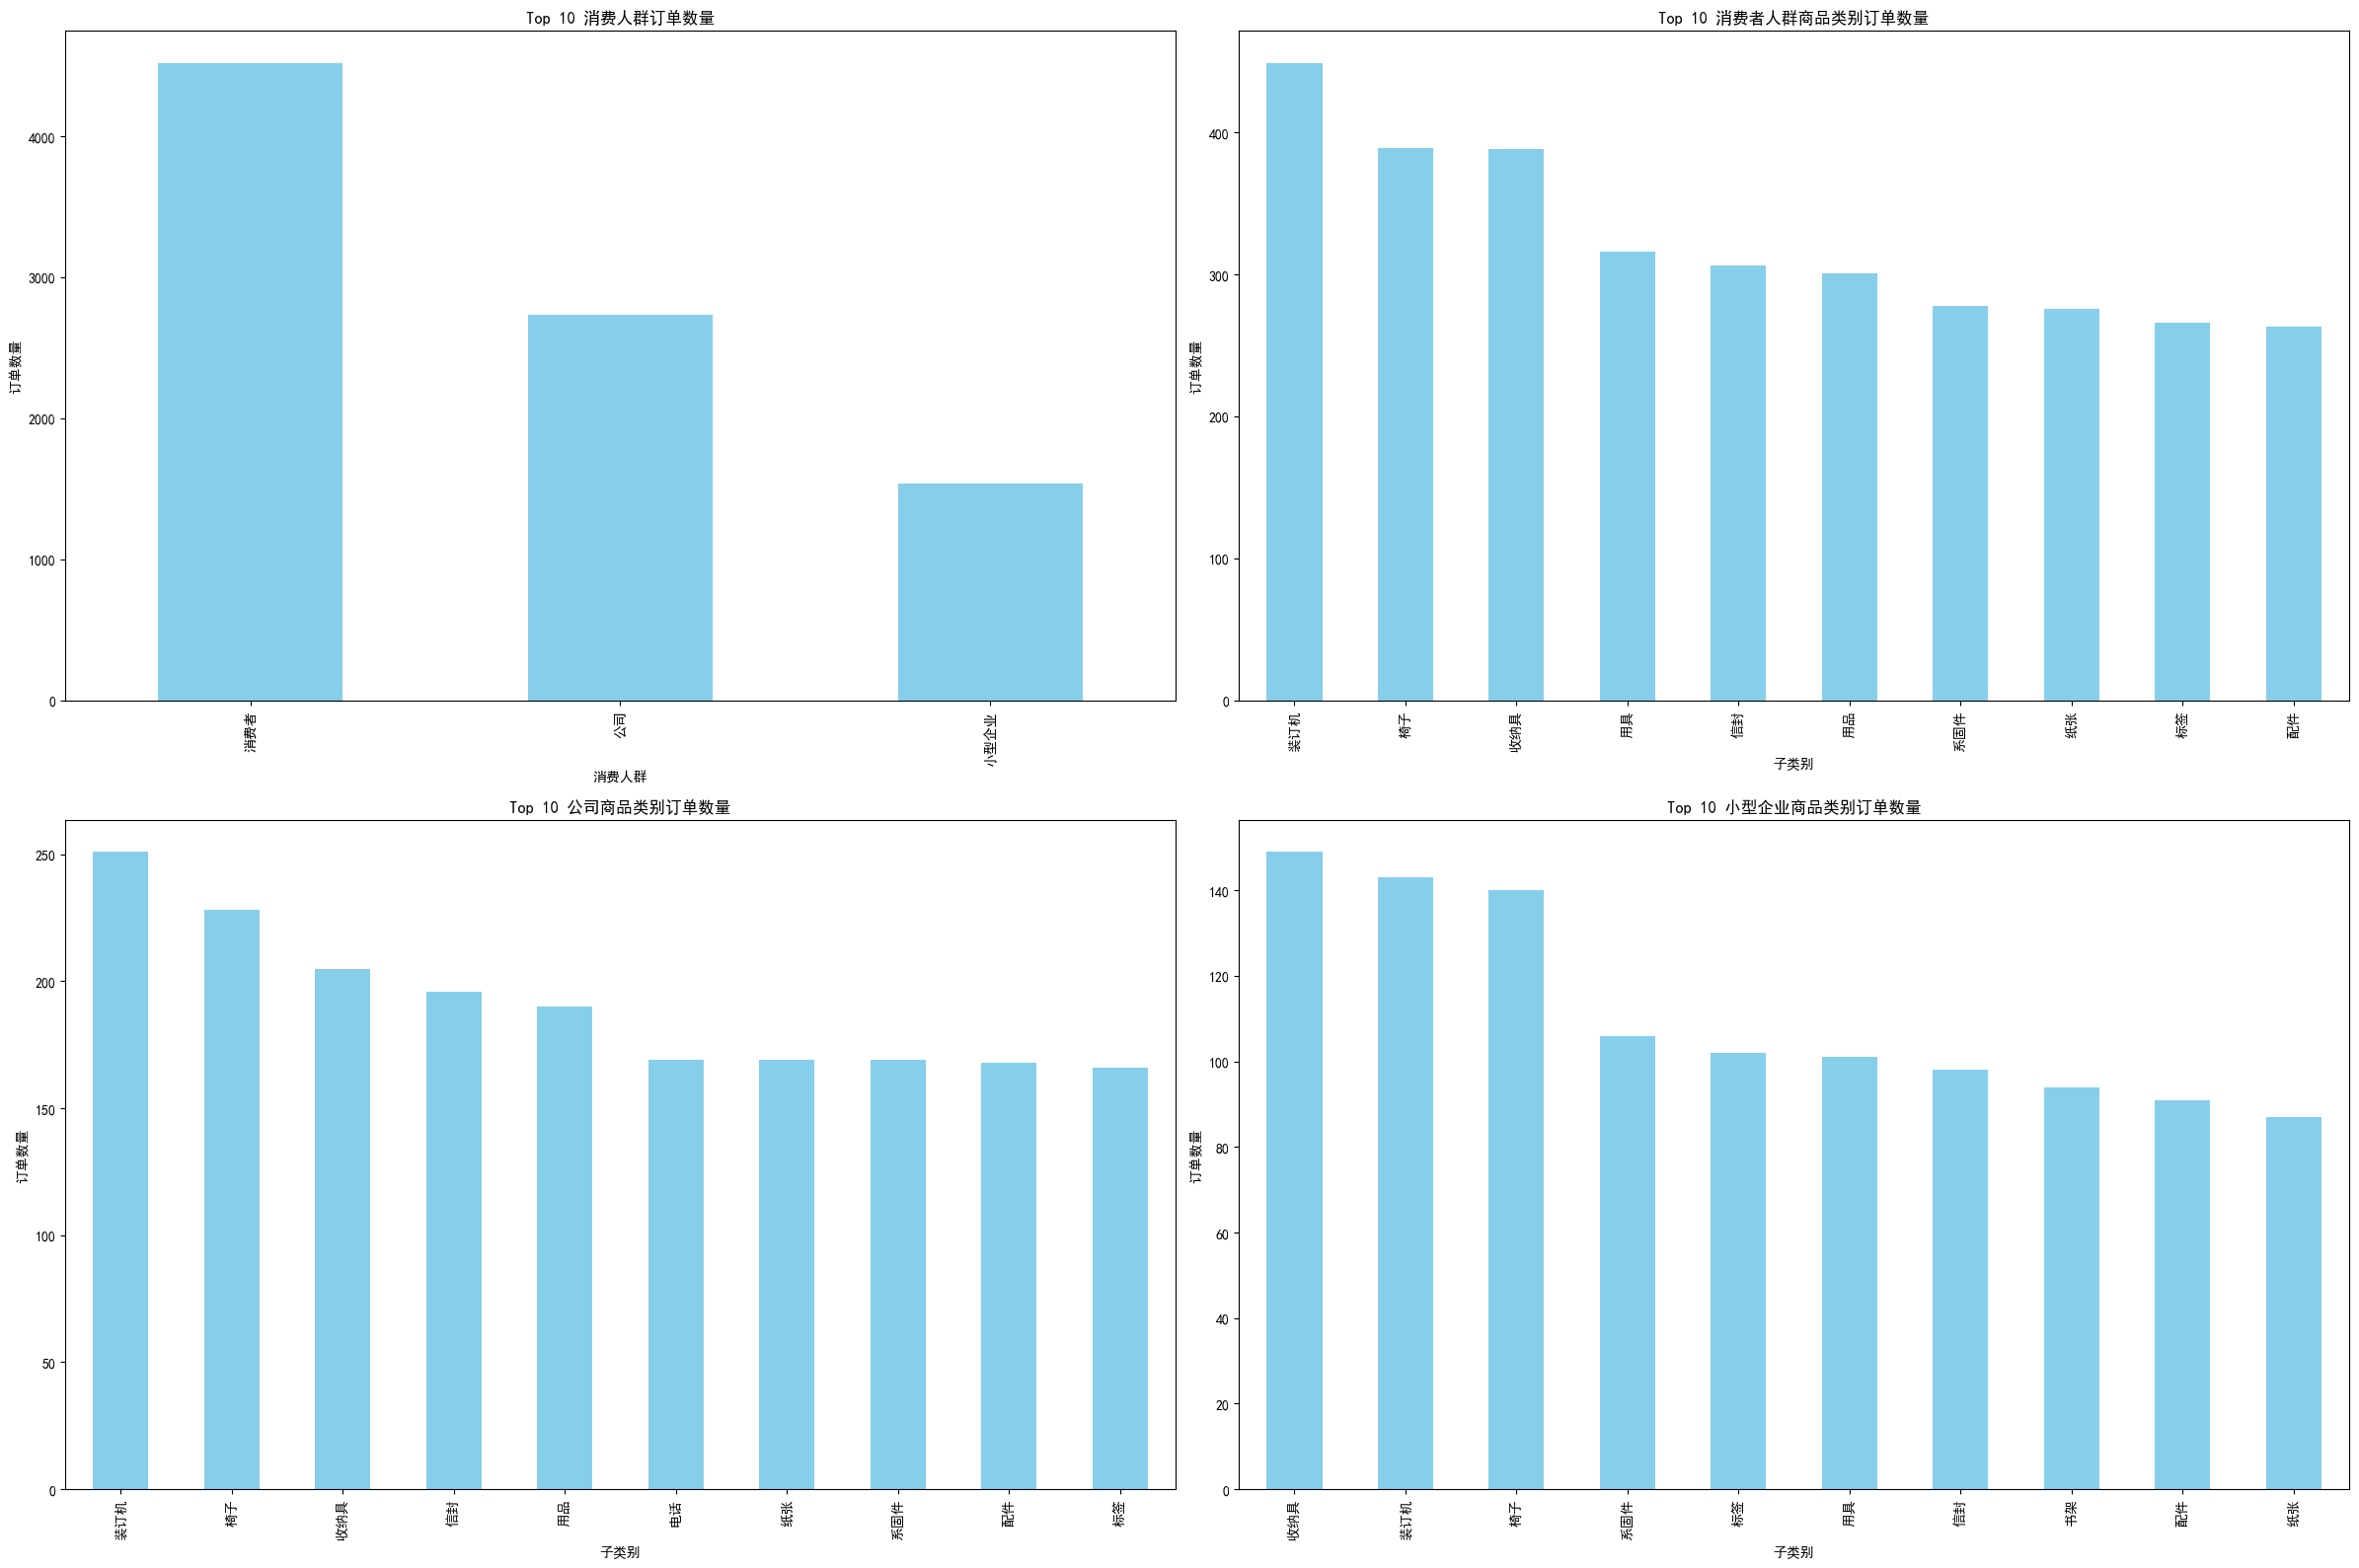

In [104]:
# 探究问题一 零售业务的特征
# 消费人群与订单数统计
import pandas

def print_orderNum(data,split_attri,title,subp):
    order_count = data.groupby(split_attri)['订单 Id'].count().sort_values(ascending=False)
    print(f"{split_attri}订单数量统计：\n", order_count.head(10))

    # 制造商订单数量可视化
    plt.subplot(2, 2, subp)
    order_count.head(10).plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(split_attri)
    plt.ylabel("订单数量")

data=pandas.read_csv("./preprocessed.csv")
order_count = data.groupby('细分')['订单 Id'].count().sort_values(ascending=False)
print("消费人群订单数量统计：\n", order_count.head(10))

# 制造商订单数量可视化
plt.figure(figsize=(24, 16))
plt.subplot(2, 2, 1)
order_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 消费人群订单数量')
plt.xlabel('消费人群')
plt.ylabel('订单数量')


# 消费者订单统计
comsumer_data=data[data["细分"]=="消费者"]
print_orderNum(comsumer_data,"子类别","Top 10 消费者人群商品类别订单数量",2)
# 公司订单统计
company_data=data[data["细分"]=="公司"]
print_orderNum(company_data,"子类别","Top 10 公司商品类别订单数量",3)
# 小型企业统计
small_bussiness_data=data[data["细分"]=="小型企业"]
print_orderNum(small_bussiness_data,"子类别","Top 10 小型企业商品类别订单数量",4)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


城市订单数量统计：
 城市
上海    265
天津    233
北京    213
武汉    176
重庆    167
沈阳    164
广州    131
成都    126
深圳    120
西安    111
Name: 订单 Id, dtype: int64
城市tail订单数量统计：
 城市
安康     1
塔河     1
白银     1
郑家屯    1
濉溪     1
余下     1
琼山     1
白城     1
白碱滩    1
徐城     1
Name: 订单 Id, dtype: int64


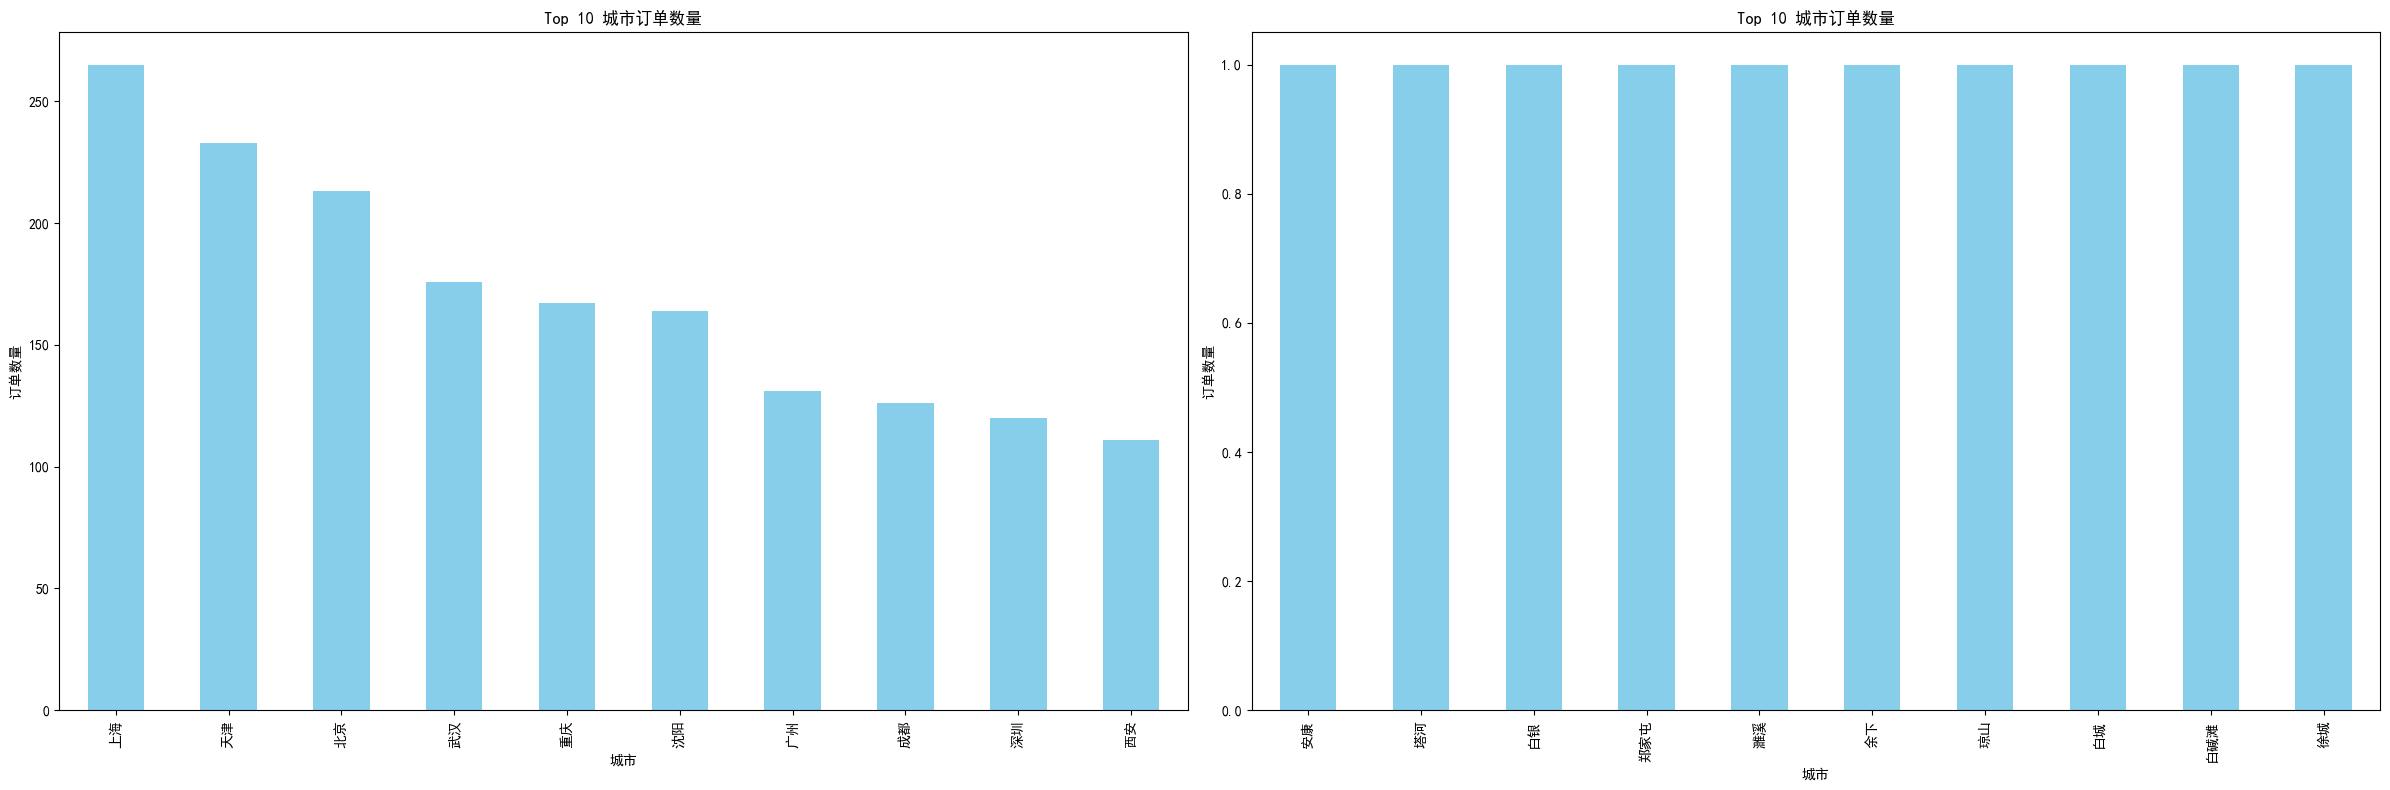

In [105]:
# 探究问题一 零售业务的特征
# 城市与订单数统计
import pandas
data=pandas.read_csv("./preprocessed.csv")
order_count = data.groupby('城市')['订单 Id'].count().sort_values(ascending=False)
print("城市订单数量统计：\n", order_count.head(10))
print("城市tail订单数量统计：\n", order_count.tail(10))

# 制造商订单数量可视化
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
order_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 城市订单数量')
plt.xlabel('城市')
plt.ylabel('订单数量')

plt.subplot(1, 2, 2)
order_count.tail(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 城市订单数量')
plt.xlabel('城市')
plt.ylabel('订单数量')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


制造商平均利润率统计：
 制造商
Smead        0.287945
Rogers       0.276287
Jiffy        0.262315
GlobeWeis    0.260992
Cameo        0.258361
施乐           0.249600
Fellowes     0.249528
Kraft        0.237218
Green Bar    0.234381
Ames         0.221724
Name: 利润率, dtype: float64
制造商平均利润率统计：
 制造商
Bevis         0.035333
KitchenAid    0.025000
OIC           0.021293
夏普            0.018182
冲电器           0.009697
Barricks     -0.001333
思科           -0.001856
三星           -0.008333
Lesro        -0.009231
Chromcraft   -0.029444
Name: 利润率, dtype: float64


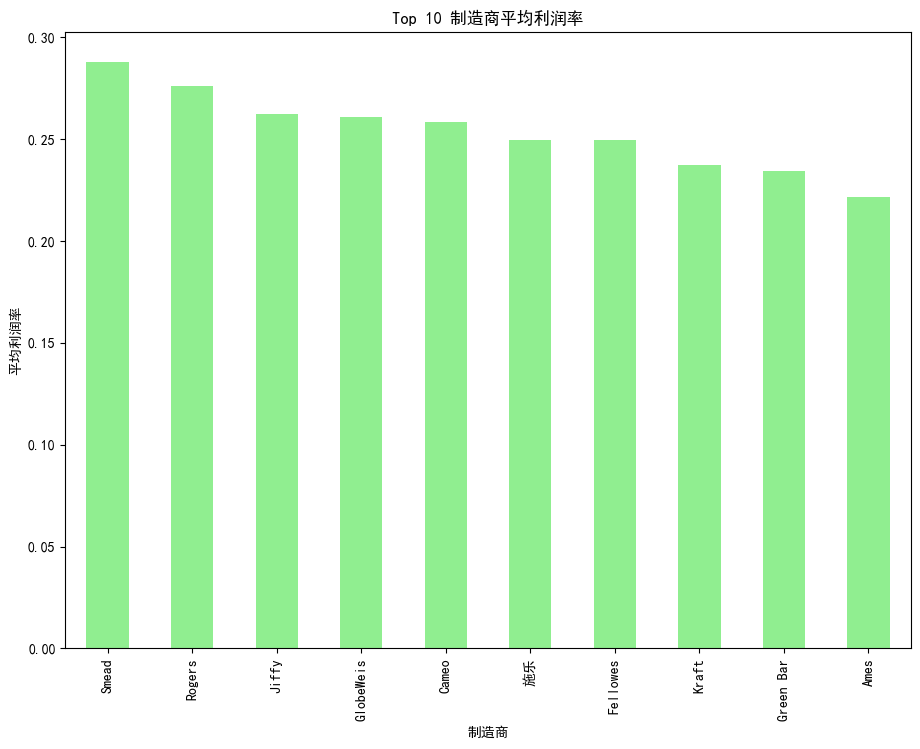

In [106]:
# 利润率统计
profit_rate_mean = data.groupby('制造商')['利润率'].mean().sort_values(ascending=False)
print("制造商平均利润率统计：\n", profit_rate_mean.head(10))
print("制造商平均利润率统计：\n", profit_rate_mean.tail(10))

# 制造商平均利润率可视化
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
profit_rate_mean.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 制造商平均利润率')
plt.xlabel('制造商')
plt.ylabel('平均利润率')
plt.show()


地区销售额统计：
 地区
华东    2773560.0
中南    2411582.0
东北    1557153.0
华北    1368456.0
西南     852781.0
西北     420981.0
Name: 销售额, dtype: float64


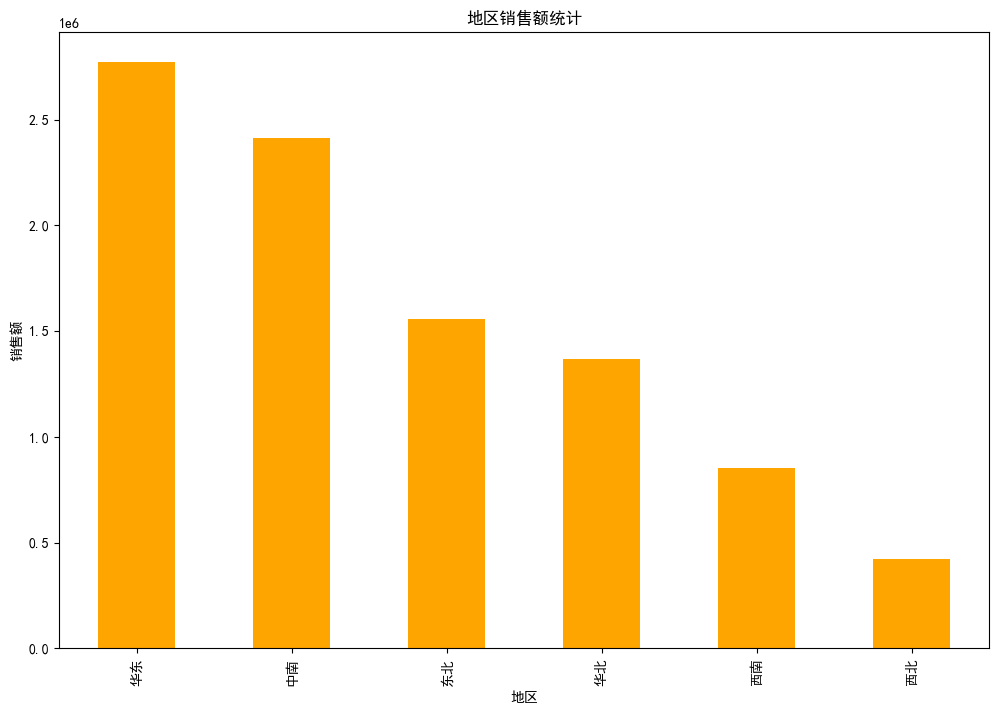

In [107]:
# 地区销售额统计
region_sales = data.groupby('地区')['销售额'].sum().sort_values(ascending=False)
print("地区销售额统计：\n", region_sales)

# 地区销售额可视化
plt.figure(figsize=(12, 8))
region_sales.plot(kind='bar', color='orange')
plt.title('地区销售额统计')
plt.xlabel('地区')
plt.ylabel('销售额')
plt.show()


总客户数量： 771
每个客户的平均销售额统计：
 客户名称
唐蔓楚    15846.666667
靳刚      9016.000000
何娇      6442.000000
韩凤      5462.428571
佘虢      5180.714286
武杰      4865.071429
徐婵      4362.894737
陈惠英     4299.500000
柯婵      3895.666667
涂丽      3889.588235
Name: 销售额, dtype: float64


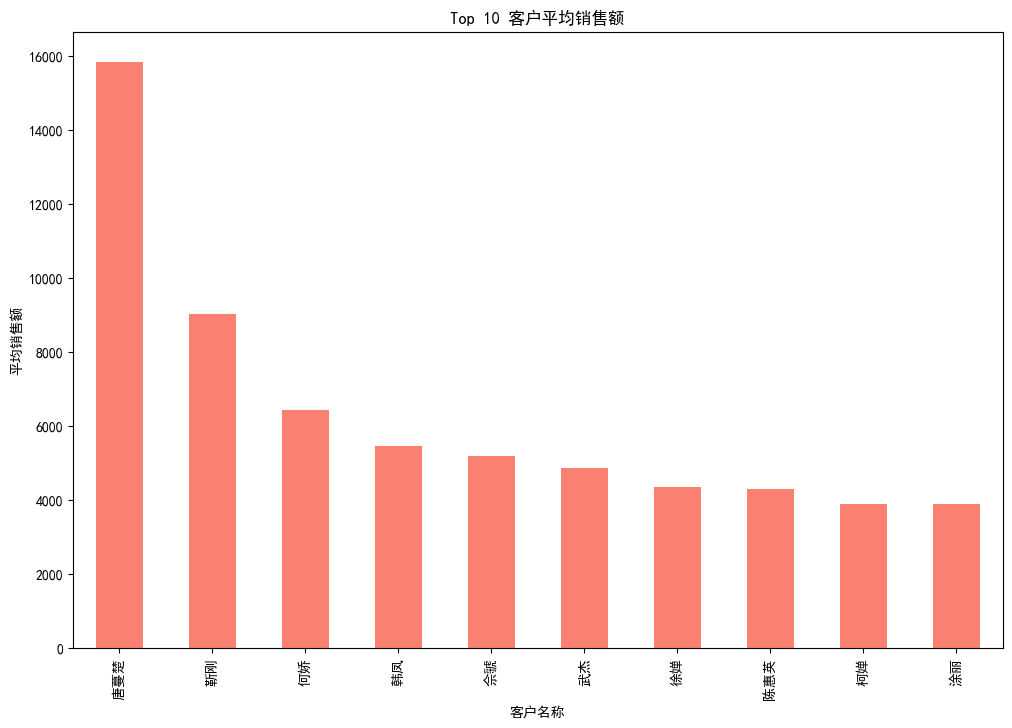

35
                   产品名称  子类别 客户名称  细分      销售额
330   Stiletto 修剪器, 锯齿状   用品  唐蔓楚  公司    368.0
331       Bevis 会议桌, 组装   桌子  唐蔓楚  公司  35621.0
332      Hoover 微波炉, 银色   器具  唐蔓楚  公司  11551.0
4446       Hon 运输标签, 可调   标签   何娇  公司    260.0
4647  Hewlett 无线传真机, 彩色  复印机   何娇  公司   3562.0
8352      SAFCO 扶手椅, 红色   椅子   何娇  公司  15504.0
9358      摩托罗拉 充电器, 全尺寸   电话   靳刚  公司   9016.0
+------+--------------------------+--------+----------+------+---------+
|      |         产品名称         | 子类别 | 客户名称 | 细分 | 销售额  |
+------+--------------------------+--------+----------+------+---------+
| 330  | Stiletto 修剪器, 锯齿状  |  用品  |  唐蔓楚  | 公司 |  368.0  |
| 331  |    Bevis 会议桌, 组装    |  桌子  |  唐蔓楚  | 公司 | 35621.0 |
| 332  |   Hoover 微波炉, 银色    |  器具  |  唐蔓楚  | 公司 | 11551.0 |
| 4446 |    Hon 运输标签, 可调    |  标签  |   何娇   | 公司 |  260.0  |
| 4647 | Hewlett 无线传真机, 彩色 | 复印机 |   何娇   | 公司 | 3562.0  |
| 8352 |    SAFCO 扶手椅, 红色    |  椅子  |   何娇   | 公司 | 15504.0 |
| 9358 | 摩托罗拉 充电器, 全尺寸  |  电话  |   靳刚   | 公司 | 9016.0 

In [108]:
from tabulate import tabulate
# 客户数量统计
data=pandas.read_csv("./superMarket.csv")
customer_count = data['客户名称'].nunique()
print("总客户数量：", customer_count)

# 每个客户的平均销售额统计
avg_sales_per_customer = data.groupby('客户名称')['销售额'].mean().sort_values(ascending=False)
print("每个客户的平均销售额统计：\n", avg_sales_per_customer.head(10))

# 每个客户的平均销售额可视化
plt.figure(figsize=(12, 8))
avg_sales_per_customer.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 客户平均销售额')
plt.xlabel('客户名称')
plt.ylabel('平均销售额')
plt.show()

# 筛选订单数据
top10_orders = data[data['客户名称'].isin(avg_sales_per_customer.head(3).index)]


# 整理订单信息
top10_orders_info = top10_orders[['产品名称','子类别', '客户名称', '细分', '销售额']]
print(top10_orders_info.size)
print(top10_orders_info)
# 使用tabulate库将信息打印成表格形式
table = tabulate(top10_orders_info, headers='keys', tablefmt='pretty')

# 打印结果
print(table)

data=pandas.read_csv("./preprocessed.csv")


探究问题二：商品类别畅销特点

c:\Users\86186\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\86186\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


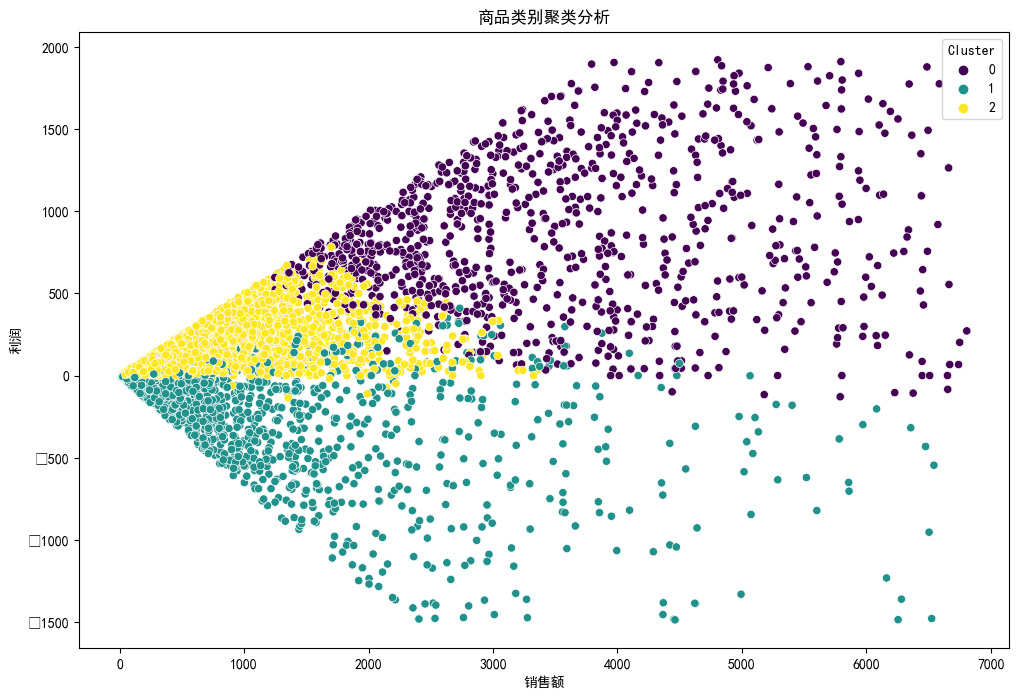

In [109]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# 设置全局字体为宋体
plt.rcParams['font.sans-serif'] = ['SimHei']  
date=pandas.read_csv("./preprocessed.csv")
# 选择特征进行聚类分析
features_for_clustering = data[['销售额', '利润率', '折扣', '数量',"利润"]]

# 标准化数据
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# 使用KMeans聚类算法
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# 可视化商品类别聚类结果
plt.figure(figsize=(12, 8))
sns.scatterplot(x='销售额', y='利润', hue='Cluster', data=data, palette='viridis', legend='full')
plt.title('商品类别聚类分析')
plt.xlabel('销售额')
plt.ylabel('利润')
plt.show()


In [110]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 读取数据
data = pd.read_csv("./preprocessed.csv")

# 选择所有数值型特征（排除非数值型特征）
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_features]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用PCA进行降维
pca = PCA(n_components=2)  # 选择降维到的维度
X_pca = pca.fit_transform(X_scaled)

# 选择聚类数量
k = 5

# 应用K均值聚类算法
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_pca)

# 将聚类结果加入原始数据
data['Cluster'] = clusters

# 打印每个簇的统计信息
cluster_stats = data.groupby('Cluster')[numeric_features].mean()
print("每个簇的统计信息：\n", cluster_stats)


每个簇的统计信息：
               利润率  记录数          利润        折扣        数量          销售额
Cluster                                                            
0       -0.031350  1.0  -26.957926  0.368493  3.412916  1019.494129
1        0.246008  1.0  292.308281  0.005491  4.554905  1322.416742
2        0.283560  1.0  978.949686  0.014151  4.838994  3829.410063
3       -0.428218  1.0 -349.213849  0.398880  3.338086   918.890020
4        0.238899  1.0   87.355703  0.004562  2.411406   386.591247


商品类别销售额统计：
 子类别
椅子     1290119.0
书架     1236947.0
复印机    1184003.0
收纳具     906510.0
电话      827995.0
器具      698874.0
配件      611739.0
设备      536375.0
用具      435632.0
桌子      285858.0
信封      265109.0
用品      251290.0
装订机     250477.0
纸张      238551.0
美术      165947.0
系固件     113823.0
标签       85264.0
Name: 销售额, dtype: float64


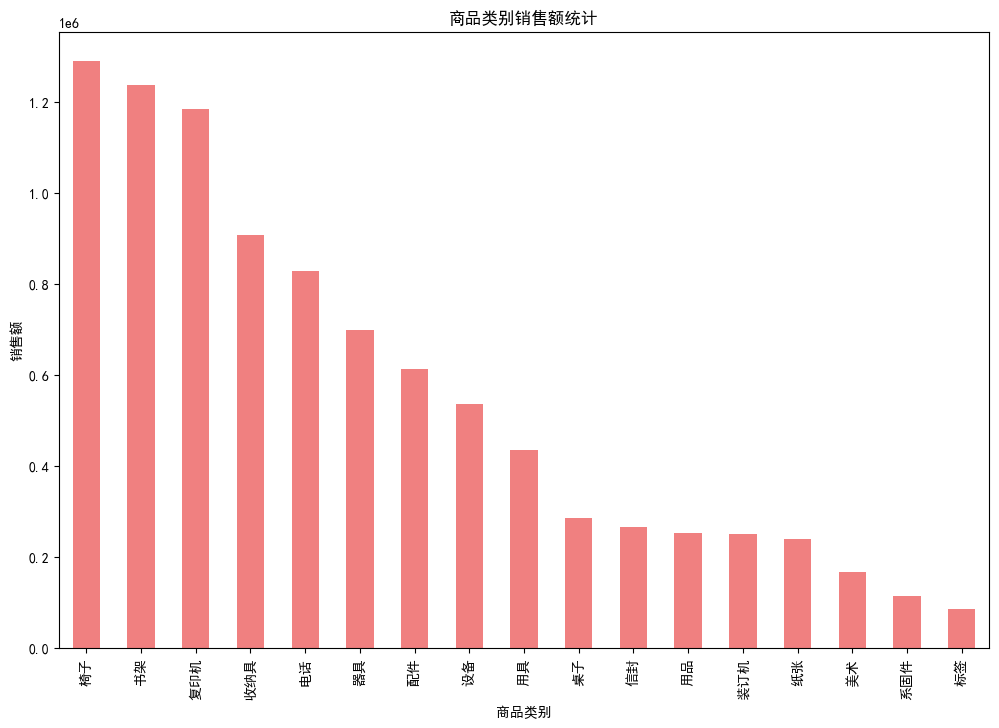

In [111]:
# 商品类别销售额统计
category_sales = data.groupby('子类别')['销售额'].sum().sort_values(ascending=False)
print("商品类别销售额统计：\n", category_sales)

# 商品类别销售额可视化
plt.figure(figsize=(12, 8))
category_sales.plot(kind='bar', color='lightcoral')
plt.title('商品类别销售额统计')
plt.xlabel('商品类别')
plt.ylabel('销售额')
plt.show()


探究问题三：销量主要影响

订单日期影响分析：
 订单日期
2013-01-01    11926.0
2013-01-02     5207.0
2013-01-03     2886.0
2013-01-04     4022.0
2013-01-05     9313.0
               ...   
2016-12-25     2455.0
2016-12-26    10336.0
2016-12-28     3938.0
2016-12-29    17230.0
2016-12-30    27156.0
Name: 销售额, Length: 1222, dtype: float64


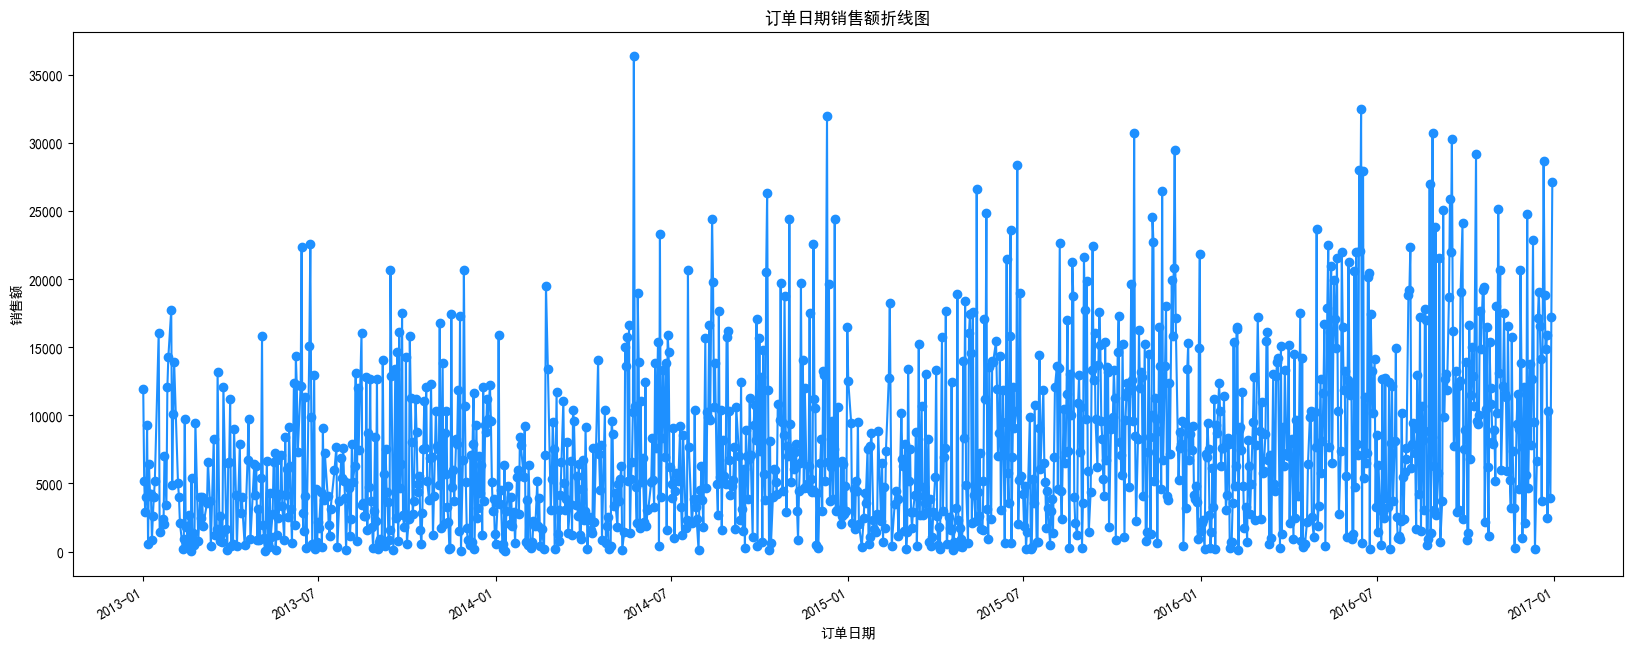

订单日期影响分析：
 订单日期
2013-01-01    11926.0
2013-01-02     5207.0
2013-01-03     2886.0
2013-01-04     4022.0
2013-01-05     9313.0
               ...   
2013-12-27     9597.0
2013-12-28     5074.0
2013-12-29     3008.0
2013-12-30     3837.0
2013-12-31     1277.0
Name: 销售额, Length: 290, dtype: float64
订单日期影响分析：
 订单日期
2014-01-01      573.0
2014-01-03     3599.0
2014-01-04    15929.0
2014-01-05     3467.0
2014-01-06     4513.0
               ...   
2014-12-27     6459.0
2014-12-28     2765.0
2014-12-29     4808.0
2014-12-30     2969.0
2014-12-31    16480.0
Name: 销售额, Length: 303, dtype: float64
订单日期影响分析：
 订单日期
2015-01-01    12501.0
2015-01-04     9470.0
2015-01-05     2071.0
2015-01-07     4587.0
2015-01-08     1689.0
               ...   
2015-12-27     4788.0
2015-12-28     3634.0
2015-12-29      950.0
2015-12-30    14980.0
2015-12-31    21811.0
Name: 销售额, Length: 306, dtype: float64
订单日期影响分析：
 订单日期
2016-01-01     1475.0
2016-01-02     2120.0
2016-01-03     2318.0
2016-01-05      150.0
2016-

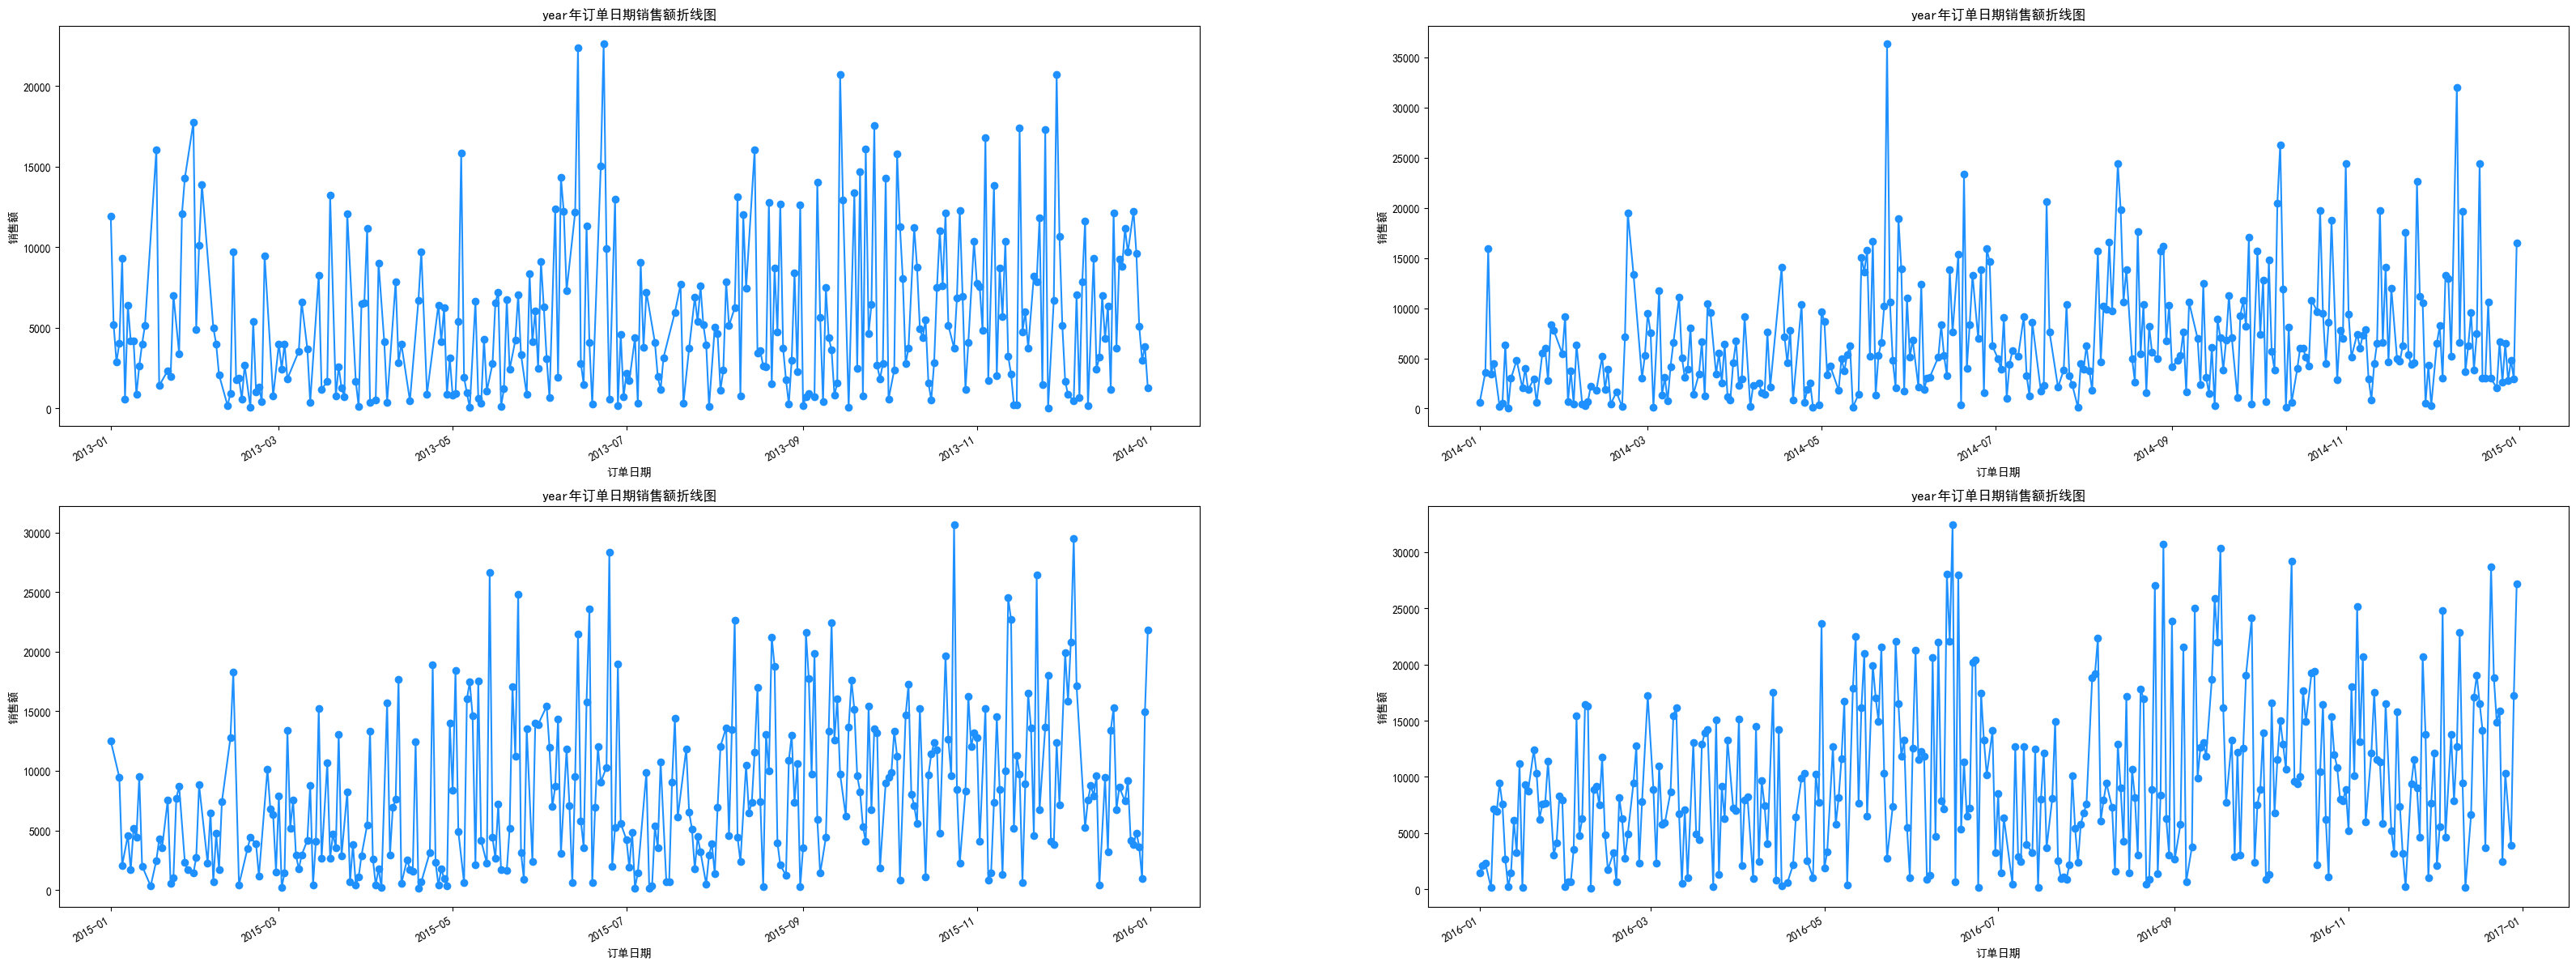

In [112]:
# 订单日期影响分析
data['订单日期'] = pd.to_datetime(data['订单日期'])
data=data.sort_values(by='订单日期')
date_effect = data.groupby('订单日期')['销售额'].sum()
print("订单日期影响分析：\n", date_effect)

# 订单日期销售额可视化
plt.figure(figsize=(20, 8))
date_effect.plot(color='dodgerblue', marker='o')
plt.title('订单日期销售额折线图')
plt.xlabel('订单日期')
plt.ylabel('销售额')
plt.show()
plt.figure(figsize=(40, 16))
def plt_by_year(data,year,num):
    plt.subplot(2,2,num)
    data=data[data["订单日期"].dt.year==year]
    date_effect = data.sort_values(by="订单日期").groupby('订单日期')['销售额'].sum()
    print("订单日期影响分析：\n", date_effect)

    # 订单日期销售额可视化
    date_effect.plot(color='dodgerblue', marker='o')
    plt.title(f'year年订单日期销售额折线图')
    plt.xlabel('订单日期')
    plt.ylabel('销售额')

# 按年打印
plt_by_year(data,2013,1)
plt_by_year(data,2014,2)
plt_by_year(data,2015,3)
plt_by_year(data,2016,4)

plt.tight_layout
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
c:\Users\86186\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  fig.canvas.draw()
c:\Users\86186\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 28070 (\N{CJK UNIFIED IDEOGRAPH-6DA6}) missing from current font.
  fig.canvas.draw()
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
c:\Users\86186\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.draw()
findfont: Generic family 'sans-serif' not found because

43955
43955


C:\Users\86186\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


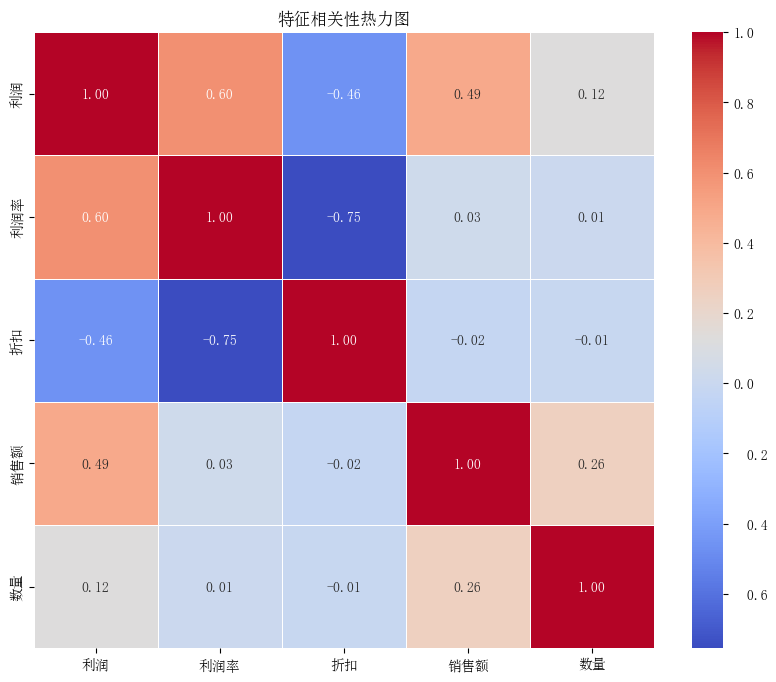

In [113]:
# 热力图绘制
# 选择所有特征
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('./preprocessed.csv')
#订单 Id,利润率,记录数,制造商,产品名称,利润,发货日期,国家,地区,城市,子类别,客户名称,折扣,数量,省/自治区,类别,细分,订单日期,邮寄方式,销售额
features = ['利润','利润率','折扣','销售额','数量']

# 设置字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 选择特定特征的数据
data_selected = data[features]
print(data_selected.size)
data_encoded = pd.get_dummies(data_selected)
print(data_encoded.size)
# 计算特征之间的相关性
correlation_matrix = data_encoded.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('特征相关性热力图')


# 设置字体
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.show()

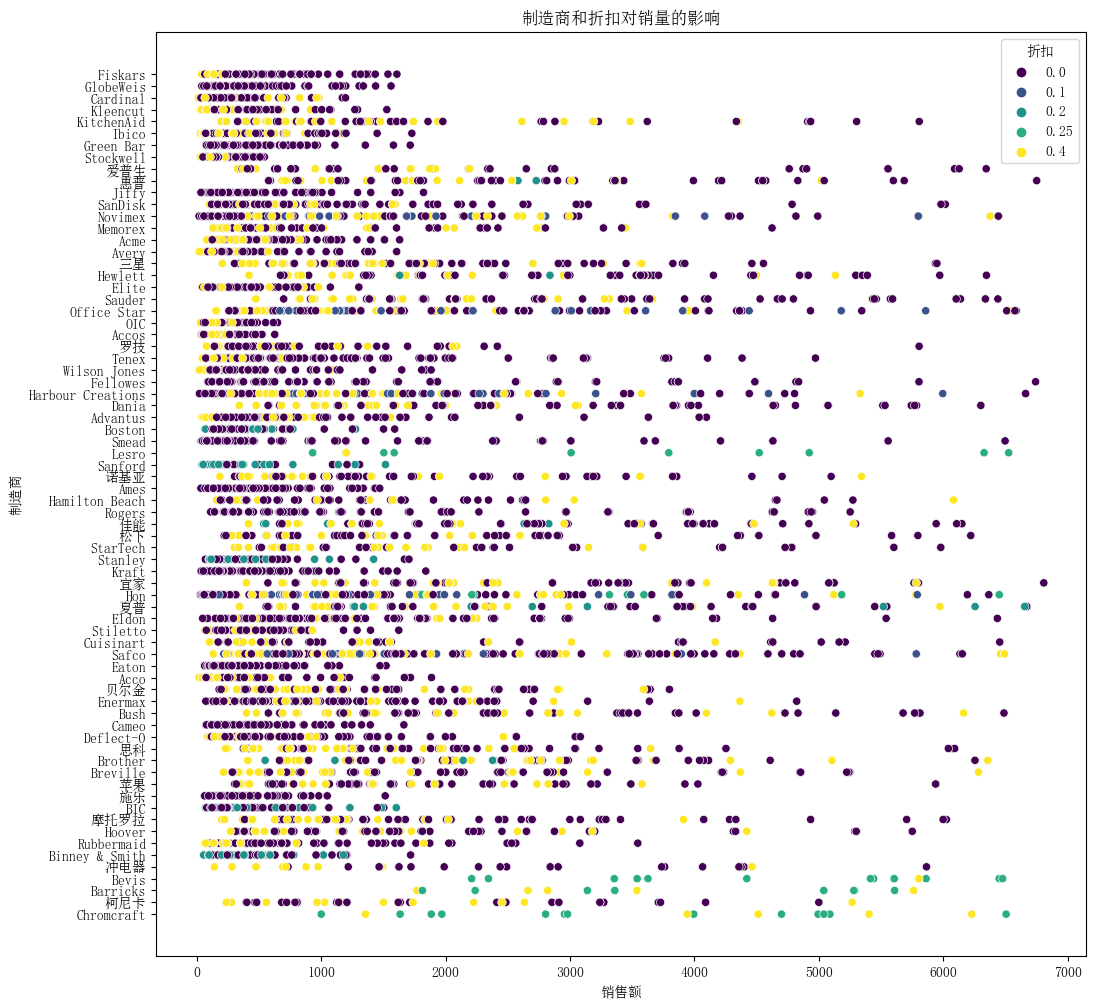

In [114]:
# 制造商和折扣对销量的影响
plt.figure(figsize=(12, 12))
sns.scatterplot(x='销售额', y='制造商', hue='折扣', data=data, palette='viridis')
plt.title('制造商和折扣对销量的影响')
plt.xlabel('销售额')
plt.ylabel('制造商')
plt.legend(title='折扣')
plt.show()


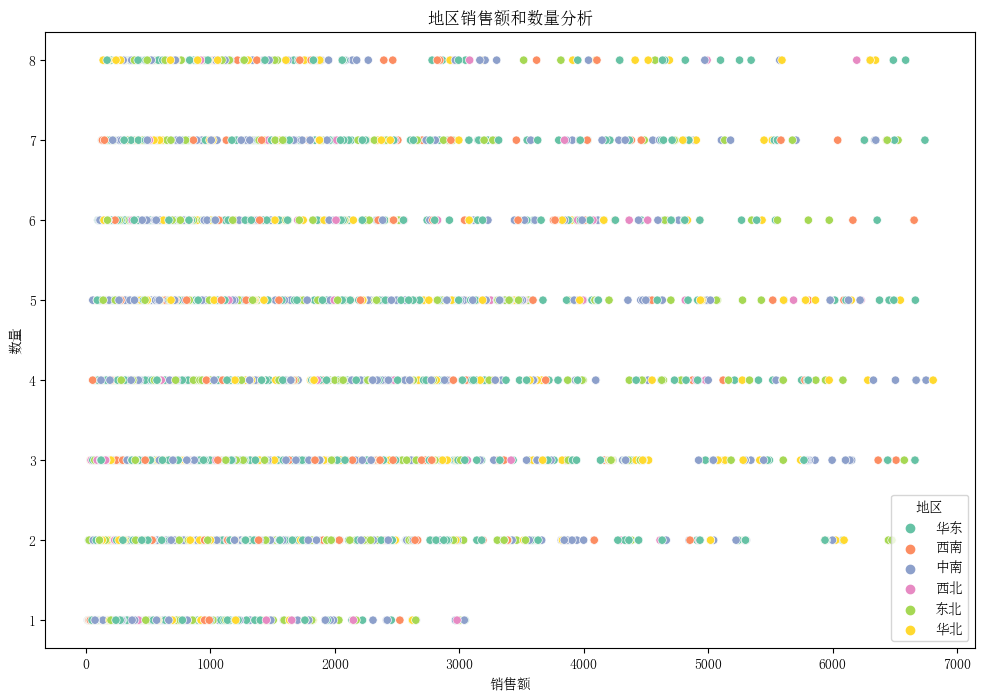

In [115]:
# 地区销售额和数量分析
plt.figure(figsize=(12, 8))
sns.scatterplot(x='销售额', y='数量', hue='地区', data=data, palette='Set2')
plt.title('地区销售额和数量分析')
plt.xlabel('销售额')
plt.ylabel('数量')
plt.legend(title='地区')
plt.show()


探究问题四：销售趋势预测

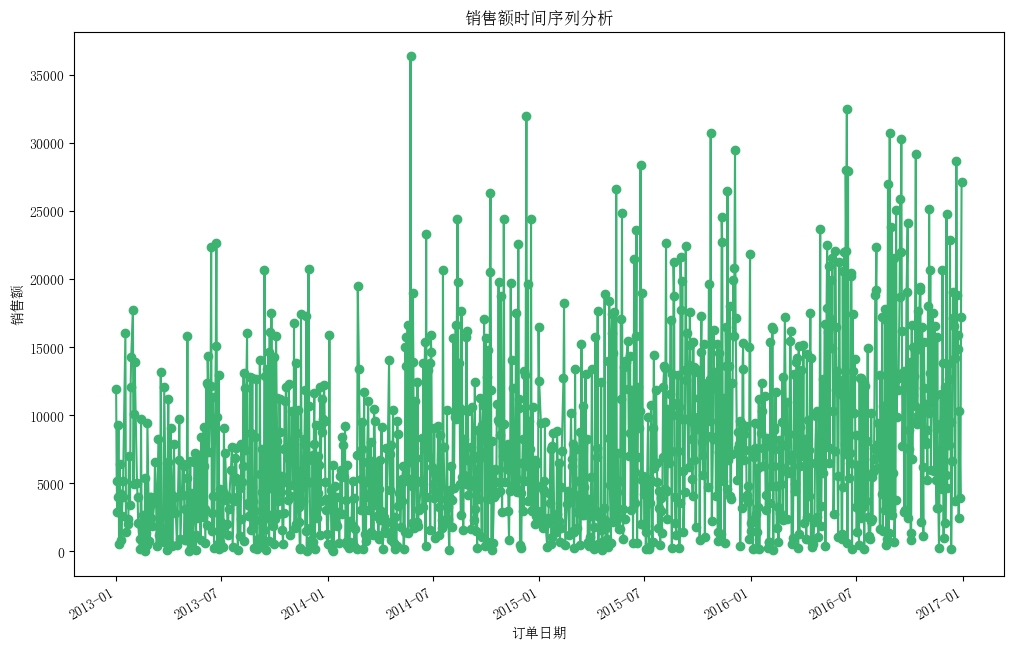

In [116]:
# 将日期转换为时间序列格式
data['订单日期'] = pd.to_datetime(data['订单日期'])

# 按照时间序列对销售额进行聚合
time_series_sales = data.groupby('订单日期')['销售额'].sum()

# 可视化时间序列销售额
plt.figure(figsize=(12, 8))
time_series_sales.plot(color='mediumseagreen', marker='o')
plt.title('销售额时间序列分析')
plt.xlabel('订单日期')
plt.ylabel('销售额')
plt.show()


均方误差(MSE): 1430452.3945825465


c:\Users\86186\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


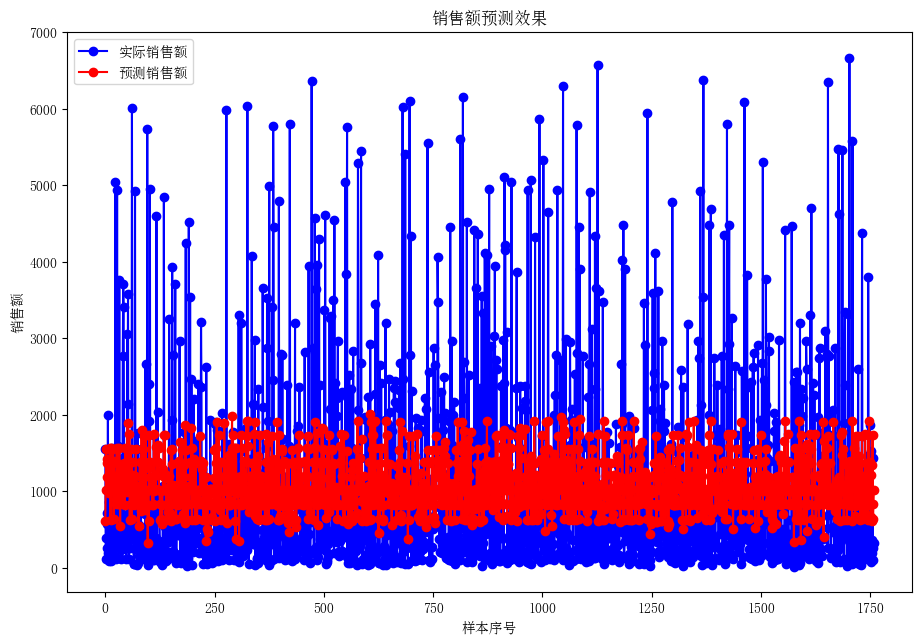

In [117]:
# 神经网络预测
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 准备数据
X = data[['利润率', '折扣', '数量']]
y = data['销售额']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建神经网络模型
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# 拟合模型
model.fit(X_train, y_train)

# 预测销售额
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print("均方误差(MSE):", mse)

# 可视化实际销售额和预测销售额
plt.figure(figsize=(24, 16))
plt.subplot(2,2,1)
plt.plot(y_test.values, label='实际销售额', color='blue', marker='o')
plt.plot(y_pred, label='预测销售额', color='red', marker='o')
plt.title('销售额预测效果')
plt.xlabel('样本序号')
plt.ylabel('销售额')
plt.legend()



决策树均方误差(MSE): 3748989.209388593
RandomForest均方误差(MSE): 3577287.435107798


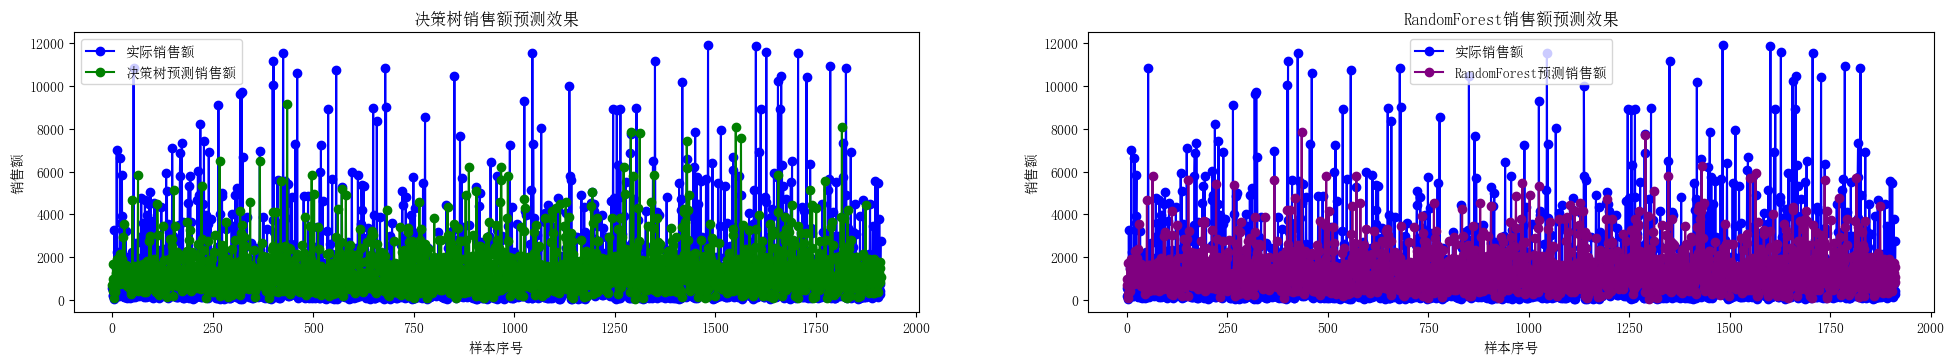

In [ ]:
# 决策树
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 准备数据
X = data[['利润率', '折扣', '数量']]
y = data['销售额']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 决策树模型
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# RandomForest模型
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# 预测销售额
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)

# 评估模型性能
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_forest = mean_squared_error(y_test, y_pred_forest)

print("决策树均方误差(MSE):", mse_tree)
print("RandomForest均方误差(MSE):", mse_forest)
plt.figure(figsize=(24, 8))
# 可视化实际销售额和预测销售额（决策树）
plt.subplot(2,2,3)
plt.plot(y_test.values, label='实际销售额', color='blue', marker='o')
plt.plot(y_pred_tree, label='决策树预测销售额', color='green', marker='o')
plt.title('决策树销售额预测效果')
plt.xlabel('样本序号')
plt.ylabel('销售额')
plt.legend()


# 可视化实际销售额和预测销售额（RandomForest）
plt.subplot(2,2,4)
plt.plot(y_test.values, label='实际销售额', color='blue', marker='o')
plt.plot(y_pred_forest, label='RandomForest预测销售额', color='purple', marker='o')
plt.title('RandomForest销售额预测效果')
plt.xlabel('样本序号')
plt.ylabel('销售额')
plt.legend()



In [ ]:
# # 贝叶斯网络
# import pandas as pd
# from pgmpy.models import BayesianNetwork
# from pgmpy.estimators import BayesianEstimator
# from pgmpy.inference import VariableElimination
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt

# # 选择需要的特征和目标变量
# features = ['利润率', '折扣', '数量']
# target_variable = '销售额'
# data_selected = data[features + [target_variable]]

# # 划分训练集和测试集
# train_data, test_data = train_test_split(data_selected, test_size=0.1, random_state=42)

# # 创建贝叶斯网络模型
# bayesian_model = BayesianNetwork([('利润率', '销售额'), ('折扣', '销售额'), ('数量', '销售额')])

# # 使用BayesianEstimator进行参数估计
# estimator = BayesianEstimator(bayesian_model, train_data)

# # 在模型上进行参数估计
# bayesian_model.fit(train_data, estimator=BayesianEstimator)

# # 推断销售额
# infer = VariableElimination(bayesian_model)

# # 手动指定变量消除的顺序
# elimination_order = ['利润率', '折扣', '数量', '销售额']
# # 创建一个空的DataFrame用于存储结果
# results_df = pd.DataFrame(columns=['销售额'])

# # 遍历测试数据集的每一行
# for _, test_row in test_data.iterrows():
#     # 创建evidence_data字典
#     evidence_data = {}
    
#     for variable in features:
#         evidence_data[variable] = test_row[variable]
#     # 进行最大后验概率推断
#     result = infer.map_query(variables=['销售额'], evidence=evidence_data)
#     # 将结果添加到结果DataFrame中
#     results_df = pd.concat([results_df, pd.DataFrame(result, index=[test_row.name])])

# # 计算均方误差
# mse_bayesian = mean_squared_error(test_data['销售额'], results_df['销售额'])

# # 打印均方误差
# print("贝叶斯网络均方误差(MSE):", mse_bayesian)
# # 可视化实际销售额和预测销售额（贝叶斯网络）
# plt.figure(figsize=(12, 8))
# plt.plot(test_data['销售额'].values, label='实际销售额', color='blue', marker='o')
# plt.plot(results_df['销售额'].values, label='贝叶斯网络预测销售额', color='orange', marker='o')
# plt.title('实际销售额和预测销售额对比')
# plt.xlabel('样本序号')
# plt.ylabel('销售额')
# plt.legend()
# plt.show()

线性回归均方误差(MSE): 3360111.213685405


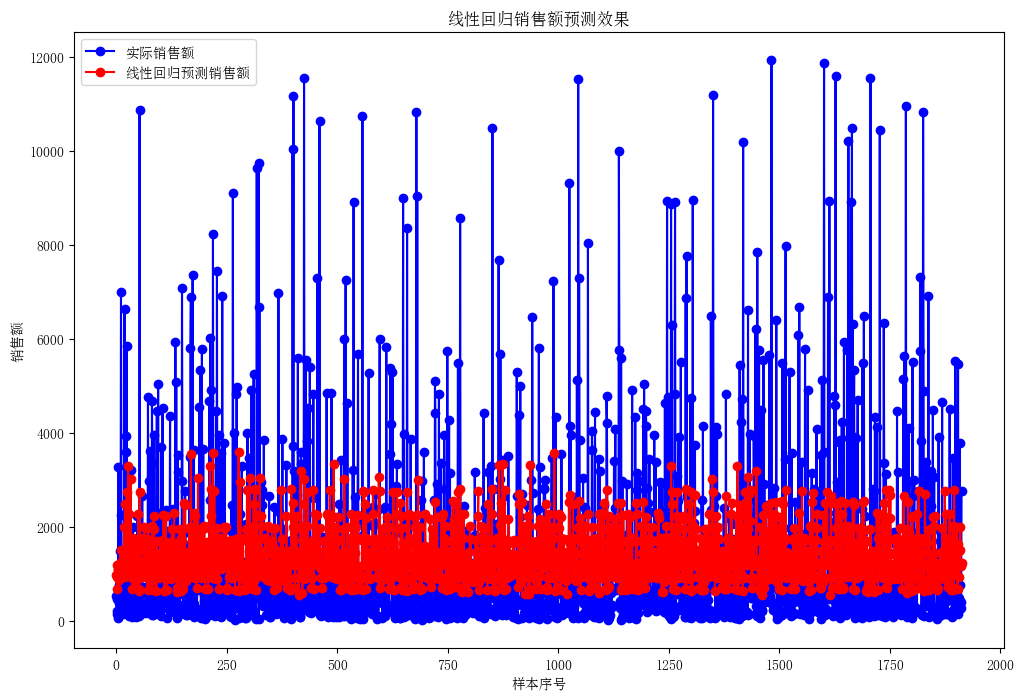

In [ ]:
from sklearn.linear_model import LinearRegression

# 线性回归模型
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 预测销售额
y_pred_linear = linear_model.predict(X_test)

# 评估模型性能
mse_linear = mean_squared_error(y_test, y_pred_linear)

print("线性回归均方误差(MSE):", mse_linear)
# 可视化实际销售额和预测销售额（线性回归）
# plt.subplot(2,2,2)
plt.figure(figsize=(12, 8))
plt.plot(y_test.values, label='实际销售额', color='blue', marker='o')
plt.plot(y_pred_linear, label='线性回归预测销售额', color='red', marker='o')
plt.title('线性回归销售额预测效果')
plt.xlabel('样本序号')
plt.ylabel('销售额')
plt.legend()
# plt.tight_layout()
plt.show()

c:\Users\86186\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


均方误差(MSE): 3357502.7068123287
决策树均方误差(MSE): 3748989.209388593
RandomForest均方误差(MSE): 3577287.435107798
线性回归均方误差(MSE): 3360111.213685405


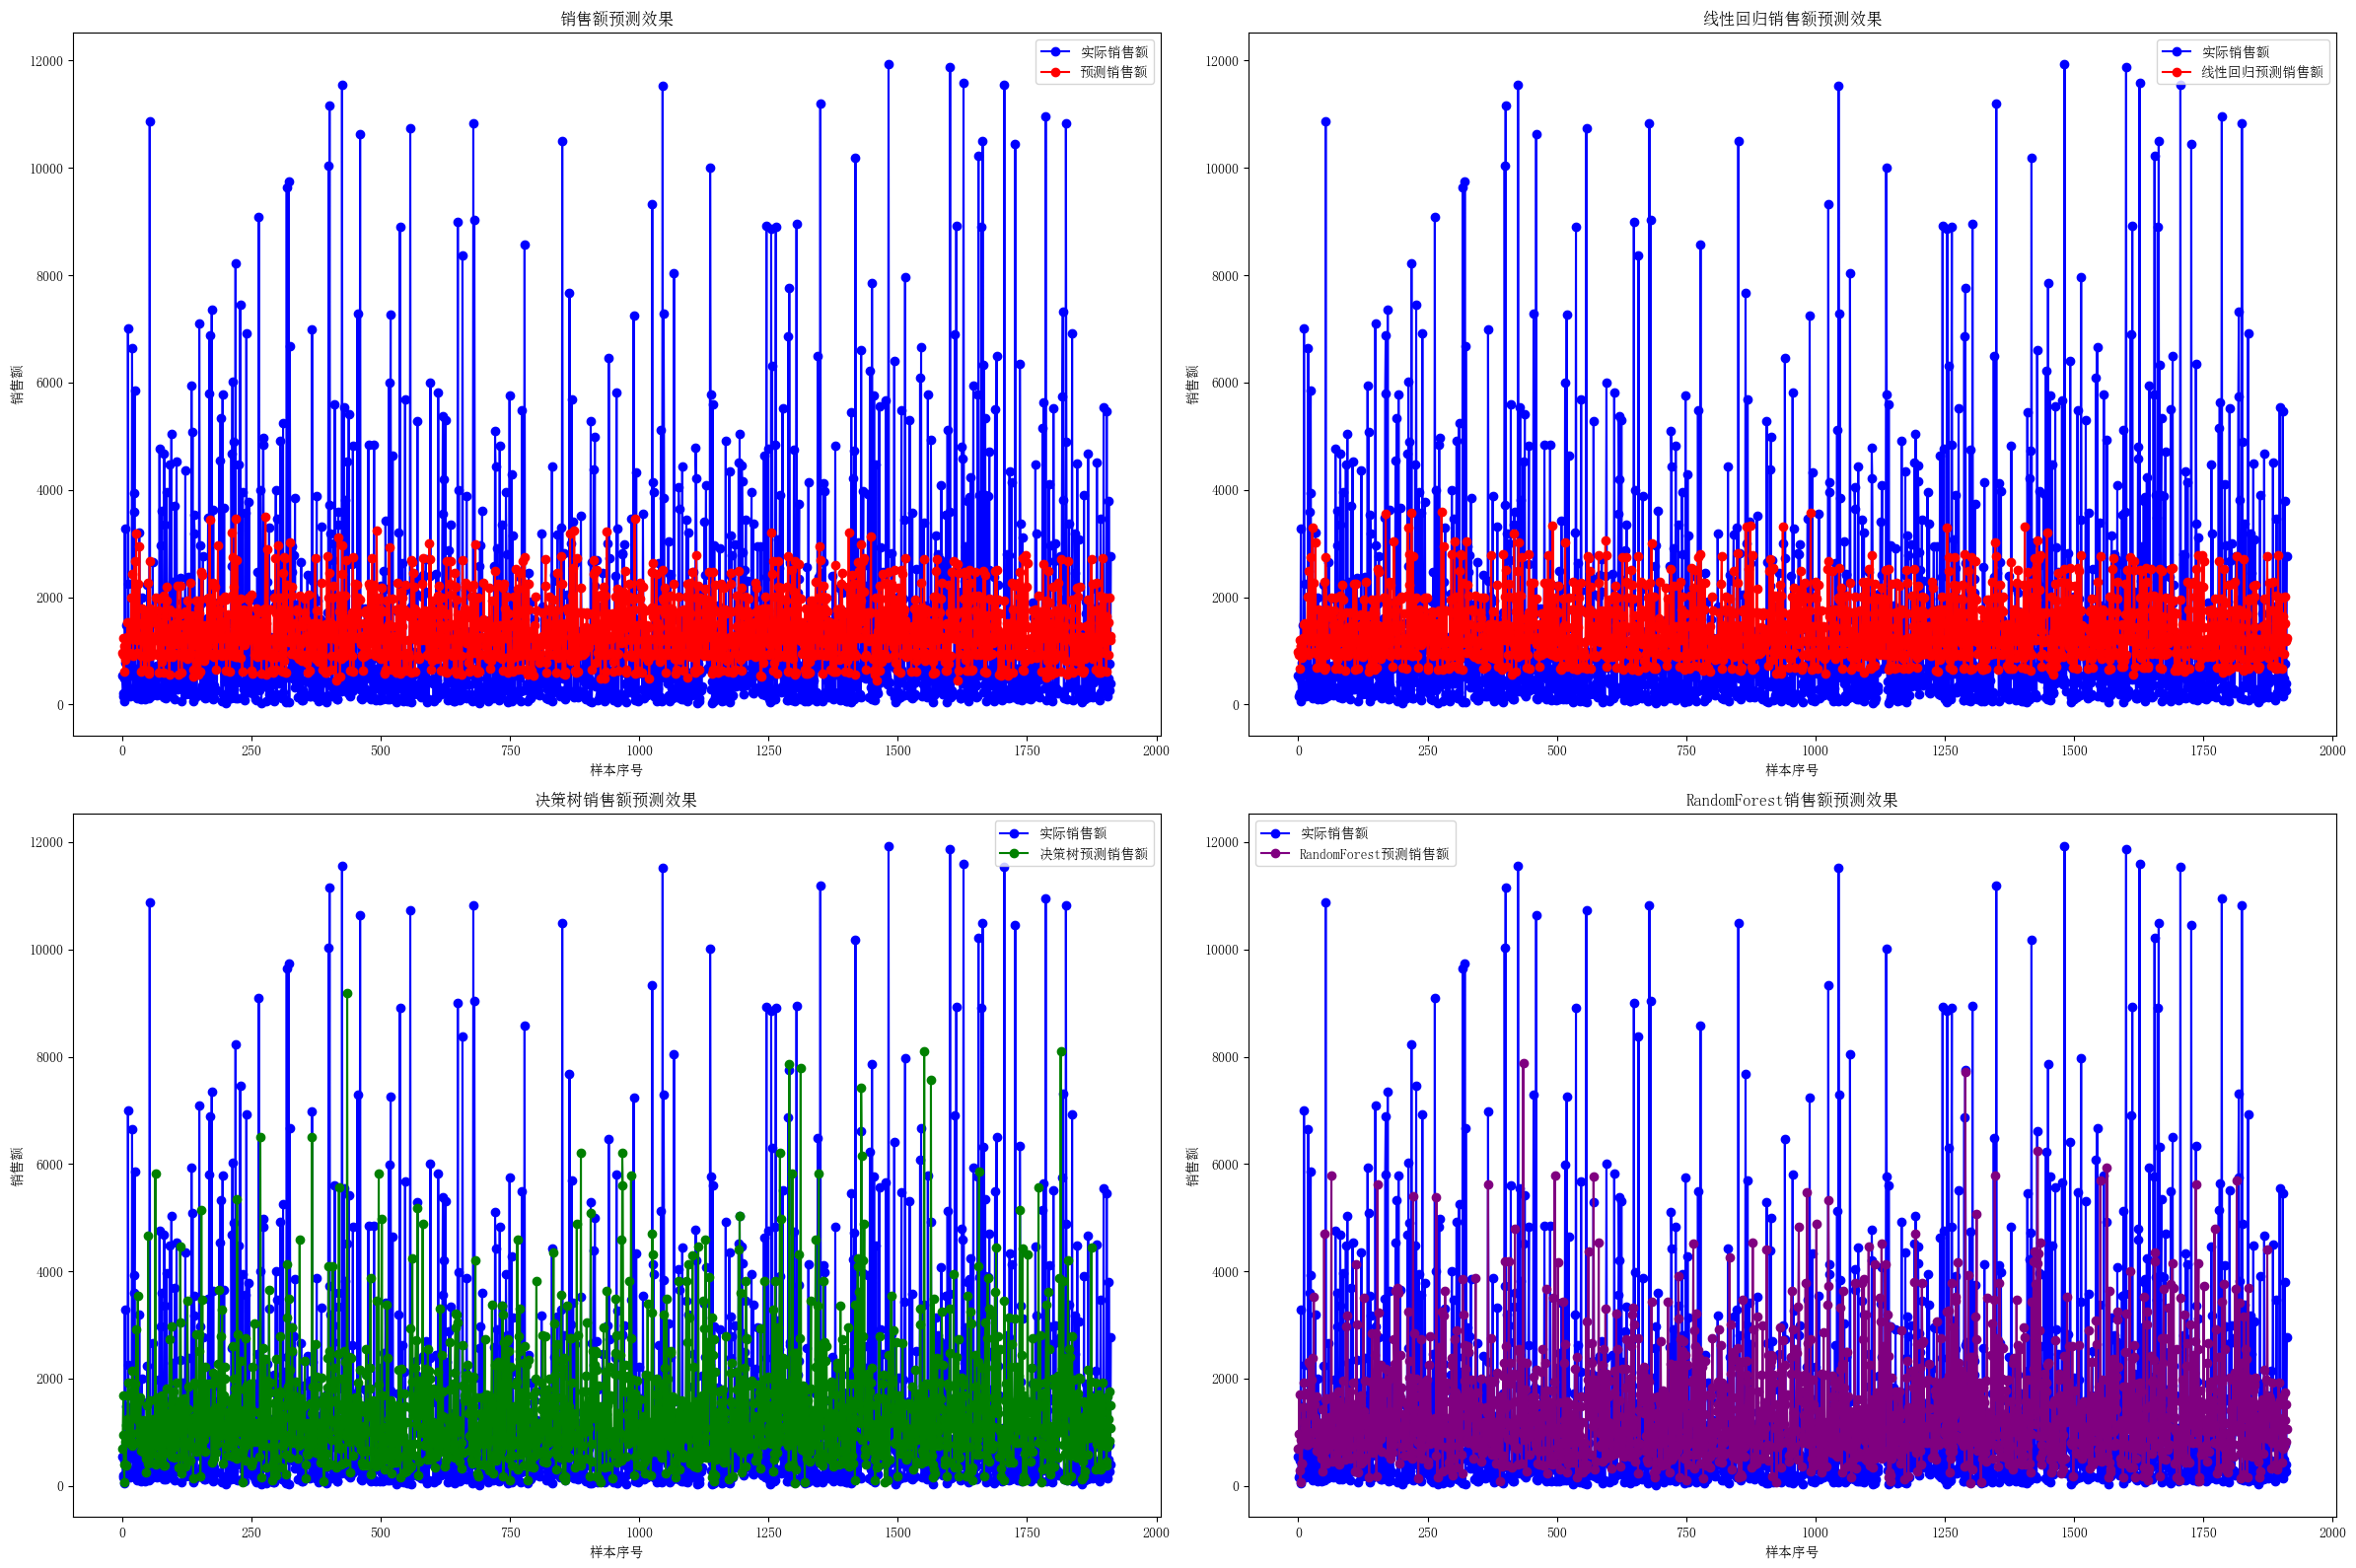

In [ ]:

# 神经网络预测
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 准备数据
X = data[['利润率', '折扣', '数量']]
y = data['销售额']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建神经网络模型
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# 拟合模型
model.fit(X_train, y_train)

# 预测销售额
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print("均方误差(MSE):", mse)

# 可视化实际销售额和预测销售额
plt.figure(figsize=(24, 16))
plt.subplot(2,2,1)
plt.plot(y_test.values, label='实际销售额', color='blue', marker='o')
plt.plot(y_pred, label='预测销售额', color='red', marker='o')
plt.title('销售额预测效果')
plt.xlabel('样本序号')
plt.ylabel('销售额')
plt.legend()



# 决策树
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 准备数据
X = data[['利润率', '折扣', '数量']]
y = data['销售额']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 决策树模型
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# RandomForest模型
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# 预测销售额
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)

# 评估模型性能
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_forest = mean_squared_error(y_test, y_pred_forest)

print("决策树均方误差(MSE):", mse_tree)
print("RandomForest均方误差(MSE):", mse_forest)
# 可视化实际销售额和预测销售额（决策树）
plt.subplot(2,2,3)
plt.plot(y_test.values, label='实际销售额', color='blue', marker='o')
plt.plot(y_pred_tree, label='决策树预测销售额', color='green', marker='o')
plt.title('决策树销售额预测效果')
plt.xlabel('样本序号')
plt.ylabel('销售额')
plt.legend()


# 可视化实际销售额和预测销售额（RandomForest）
plt.subplot(2,2,4)
plt.plot(y_test.values, label='实际销售额', color='blue', marker='o')
plt.plot(y_pred_forest, label='RandomForest预测销售额', color='purple', marker='o')
plt.title('RandomForest销售额预测效果')
plt.xlabel('样本序号')
plt.ylabel('销售额')
plt.legend()



from sklearn.linear_model import LinearRegression

# 线性回归模型
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 预测销售额
y_pred_linear = linear_model.predict(X_test)

# 评估模型性能
mse_linear = mean_squared_error(y_test, y_pred_linear)

print("线性回归均方误差(MSE):", mse_linear)
# 可视化实际销售额和预测销售额（线性回归）
plt.subplot(2,2,2)
plt.plot(y_test.values, label='实际销售额', color='blue', marker='o')
plt.plot(y_pred_linear, label='线性回归预测销售额', color='red', marker='o')
plt.title('线性回归销售额预测效果')
plt.xlabel('样本序号')
plt.ylabel('销售额')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# from sklearnex import patch_sklearn
# # 应用Intel的scikit-learn扩展
# patch_sklearn()
# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建RandomForest模型
random_forest_model = RandomForestRegressor(random_state=42)

# 创建GridSearchCV对象
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 在训练数据上进行网格搜索
grid_search.fit(X_train, y_train)

# 输出最优参数
print("最优参数:", grid_search.best_params_)

# 使用最优参数的模型进行预测
best_forest_model = grid_search.best_estimator_
y_pred_best_forest = best_forest_model.predict(X_test)

# 评估最优模型性能
mse_best_forest = mean_squared_error(y_test, y_pred_best_forest)
print("最优RandomForest均方误差(MSE):", mse_best_forest)
plt.figure(figsize=(12, 8))
# 可视化实际销售额和预测销售额（最优RandomForest）
plt.plot(y_test.values, label='实际销售额', color='blue', marker='o')
plt.plot(y_pred_best_forest, label='最优RandomForest预测销售额', color='purple', marker='o')
plt.title('最优RandomForest销售额预测效果')
plt.xlabel('样本序号')
plt.ylabel('销售额')
plt.legend()
plt.show()
